<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/practica18_MCHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 18. Ejercicios con EDA 1**
>**Alumno:** Margarita Cristina Hernández Delgadillo\
>**Matrícula:** 255879

##Descripción del conjunto de datos:
Utiliza el conjunto de datos `Air Quality` disponible al final de esta práctica. Este conjunto contiene datos horarios de sensores de calidad del aire, incluyendo niveles de CO, NOx, y otros contaminantes. El conjunto de datos tiene valores faltantes y columnas categóricas (por ejemplo, el día de la semana).

## Instrucciones para los estudiantes
1. Descargar el archivo `AirQuality.csv` desde el enlace proporcionado.
2. Realizar un EDA completo, incluyendo:
  - Descripción de los datos (medias, medianas, desviaciones estándar, etc.).
  - Histogramas para las columnas numéricas.
  - Gráficas de barras para las columnas categóricas (por ejemplo, DayOfWeek).
  - Boxplots para identificar outliers en las columnas numéricas.
  - Matriz de correlación y mapa de calor.
  - Pairplot para visualizar relaciones entre variables numéricas.
  - Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.
3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda, o eliminación de filas/columnas según sea apropiado.
4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados.
5. **Responde a estas preguntas y sube tus conclusiones a un PDF (se verificará el uso de IA)**

## Carga de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Importamos la librerías a utlizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Leemos el archivo. Se indica qie se usa el separador ';' en el archivo.
# Reemplazando el número -200 en sus variaciones por NaN ya que en donde se
# encuentra el archivo(Kaggle) se menciona que este número reemplaza datos
# faltantes
df = pd.read_csv('/content/drive/MyDrive/Unidad02/AirQuality.csv', sep=';', na_values=['-200','-200,0','-200.0'])

# Imprimimos las primeras 5 filas para verificar la carga correcta
print(df.head().to_string())
print('\n')
# Imprimimos las ultimas 5 filas para verificar también
print(df.tail().to_string())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9  0,7578          NaN          NaN
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7  0,7255          NaN          NaN
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0  0,7502          NaN          NaN
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0  0,7867          NaN          NaN
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0    131.

## Inicio de EDA

### Descripción de los datos (medias, medianas, desviaciones estándar, etc.).

In [97]:
# Se realiza la descripcion estadística con describe e info para identificar los datos de la tabla
print('El tipo de dato de cada columna es: ')
print(df.info())
print('\n')

# Descripcion estadística
print('El EDA de los datos es: ')
print(df.describe().to_string())
print('\n')

# Obtenemos la moda de cada columna
moda = df.mode().iloc[0]
print('La moda de cada columna es: ')
print(moda)

# Verificamps los valores faltantes
print("\nValores faltantes:")
print(df.isnull().sum())

# Buscamos si toda la fila está vacía
fila_vacia = df.isnull().all(axis=1)
print(fila_vacia)
print('\nNúmero de filas vacías completas', fila_vacia.sum())

# Revisamos si hay duplicados (las filas vacias son duplicados pero serán eliminadas)
print('\nNúmero de filas duplicadas', df.duplicated().sum())

El tipo de dato de cada columna es: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   object 
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   object 
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   object 
 13  RH             8991 non-null   object 
 14  AH             8991 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10),

###Graficación

###Histogramas para las columnas numéricas

Como DayOfWeek aun no es creada ya que estamos manejando los datos antes de procesar los datos no se realizará la gráfica de barras para esta columna.

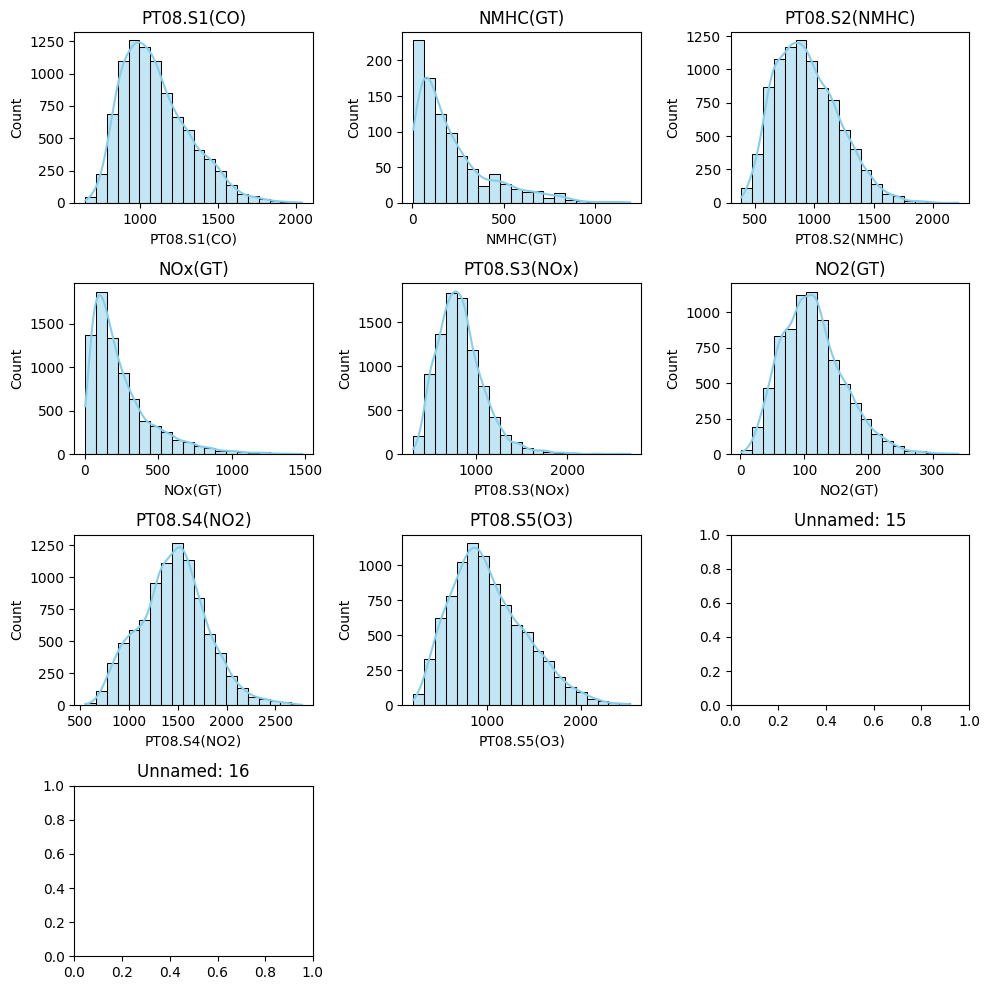

In [98]:
# Seleccionamos las columnas tipo float64
columnas_hist = df.select_dtypes(include=[np.number])

# Se define la cantidad de gráficos y la cuadrícula para mostrar los datos
num_plots = len(columnas_hist.columns)
cols = 3  # Número de columnas en la cuadrícula(Pequeño para mostrar todo)
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(10, 10))
for i, col in enumerate(columnas_hist.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(columnas_hist[col].dropna(), bins=20, kde=True, color='skyblue') # kde para PDF
    plt.title(col)

plt.tight_layout()
plt.show()


### Boxplot para datos atípicos

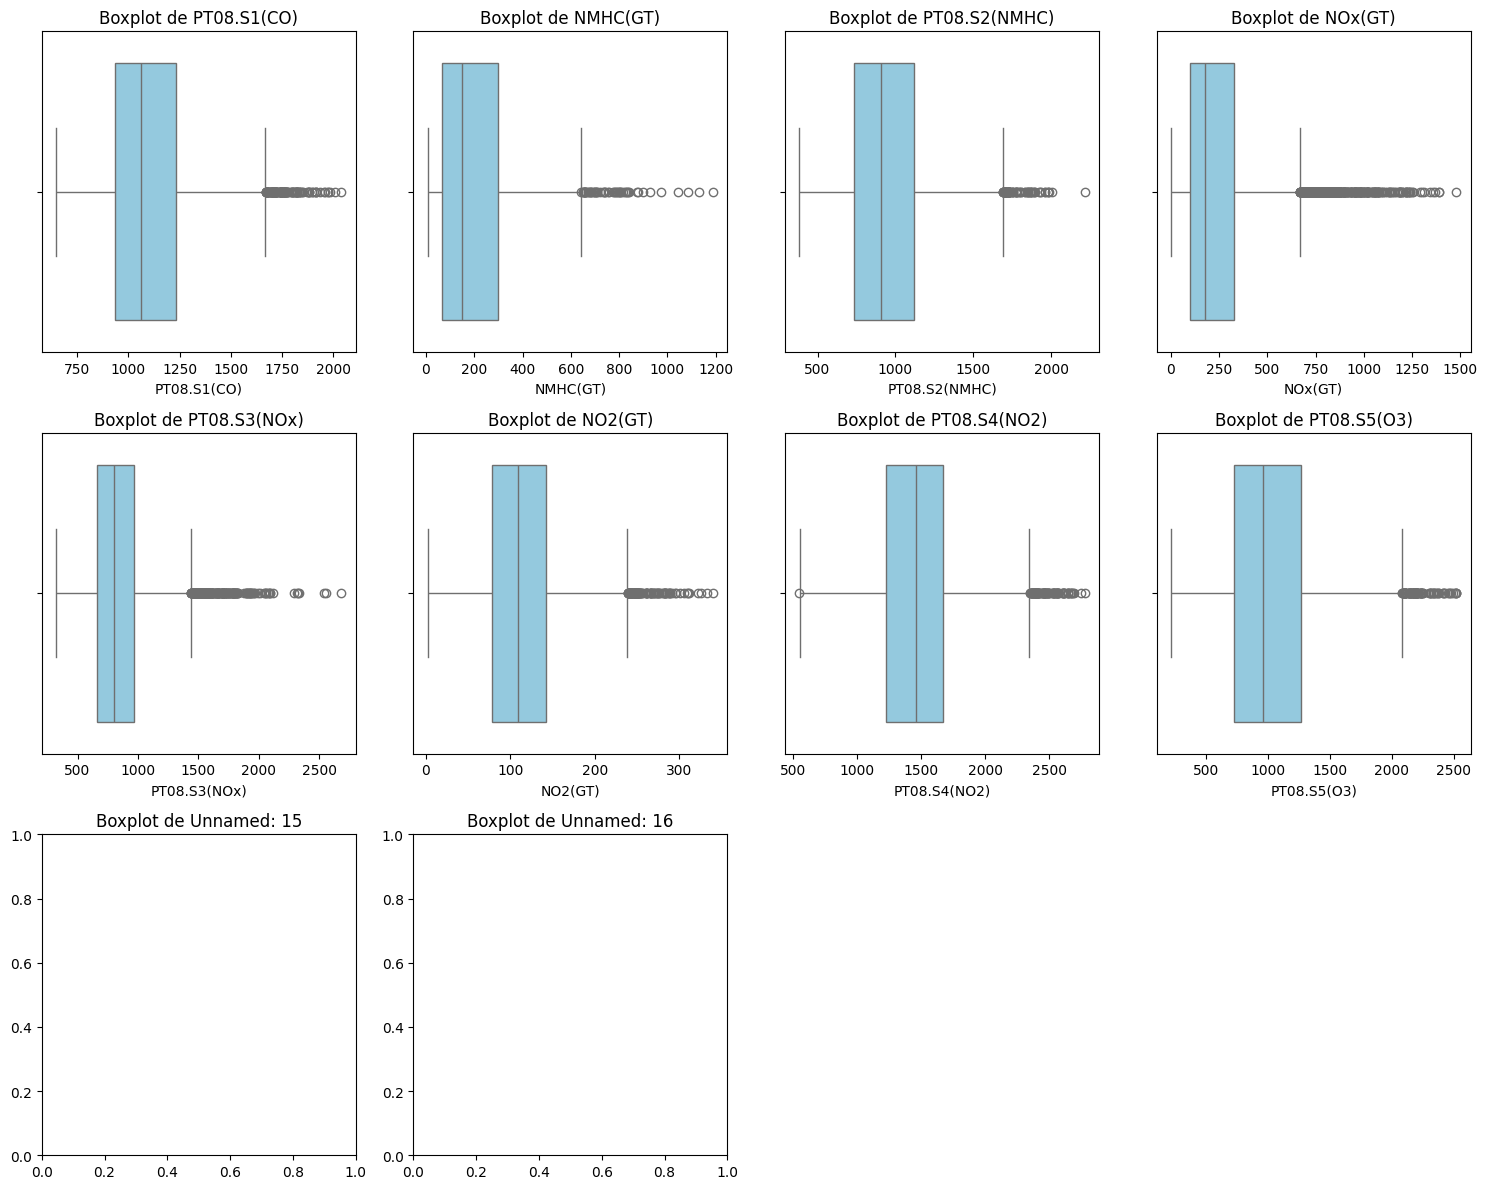

In [99]:
# Seleccionar solo columnas float64
columnas_box = df.select_dtypes(include=[np.number]).columns

# Calculo cuántas filas necesita el subplot
n = len(columnas_box)
rows = (n - 1) // 4 + 1

# Configuramos el tamaño de la figura
plt.figure(figsize=(15, rows * 4))

# Creamos boxplots para cada columna float64. dropna ayuda a cargarlos ya que marcaba error por datos faltantes
for i, col in enumerate(columnas_box, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

### Matriz de Correlación y Mapa de Calor

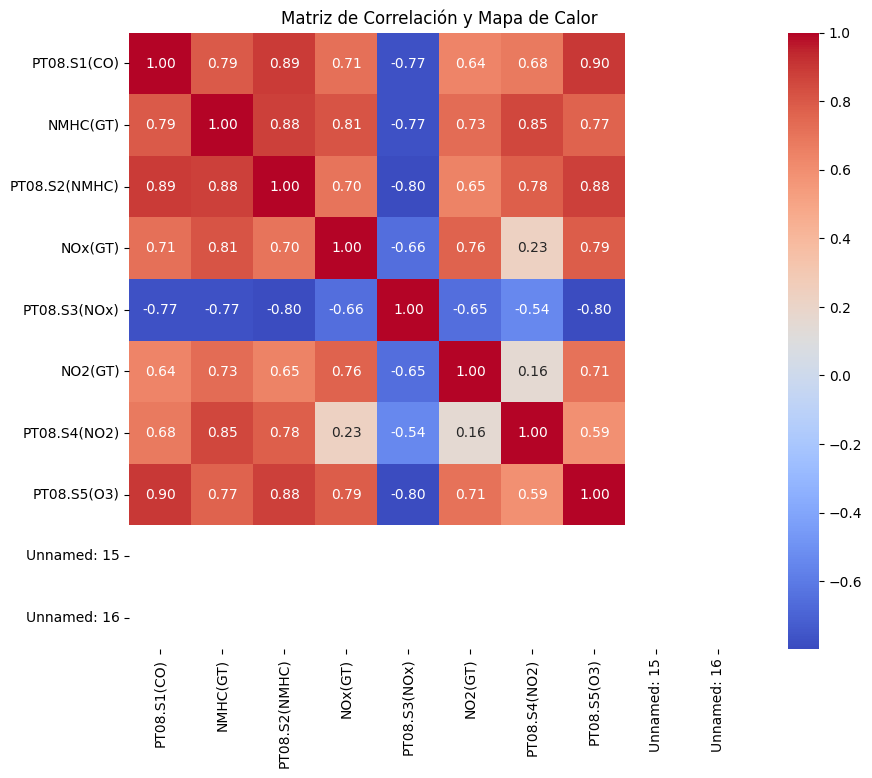

In [100]:
columnas_corr = df.select_dtypes(include=[np.number])
# Calculamos matriz de correlación
matriz_corr = columnas_corr.corr()

# Tamaño de la figura y generació del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación y Mapa de Calor")
plt.show()

### Pairplot (Scatterplot)

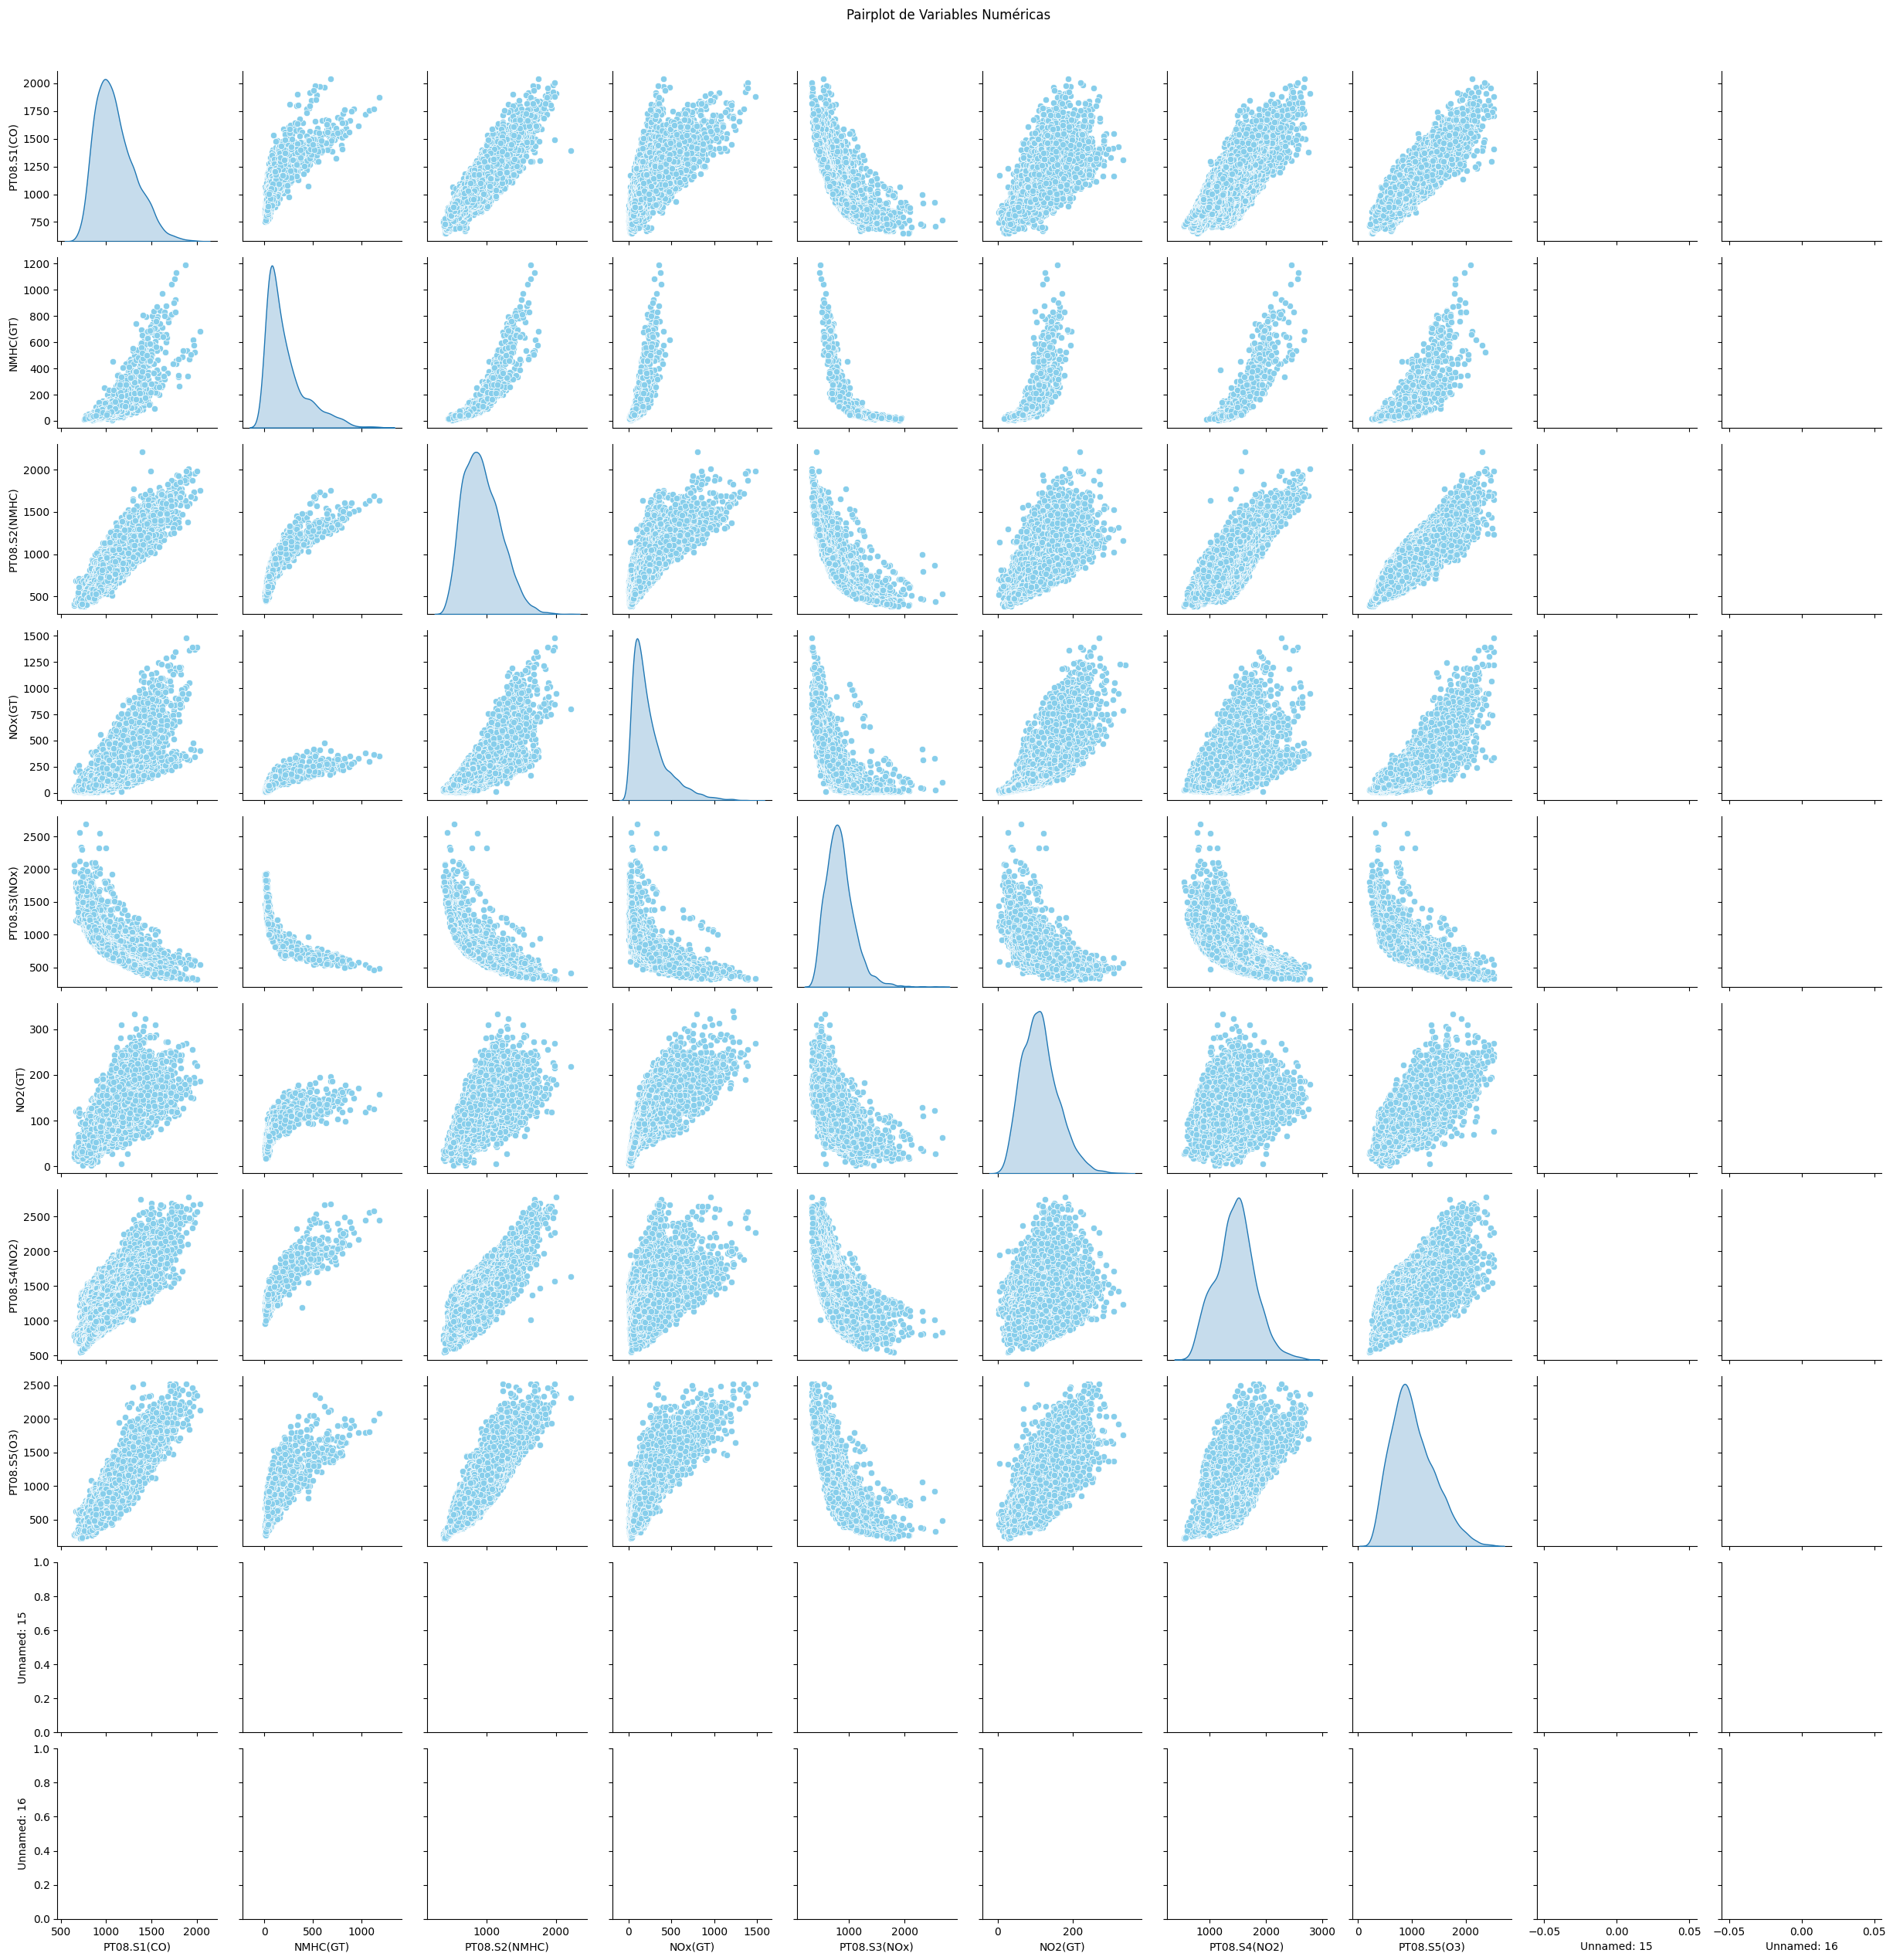

In [101]:
# Generar pairplot para las columnas numéricas
sns.pairplot(df.select_dtypes(include=[np.number]),
             diag_kind='kde',   # para que la diagonal muestre la densidad
             plot_kws={'color': 'skyblue'})
plt.suptitle("Pairplot de Variables Numéricas", y=1.02)
plt.show()

## Análisis de Normailidad

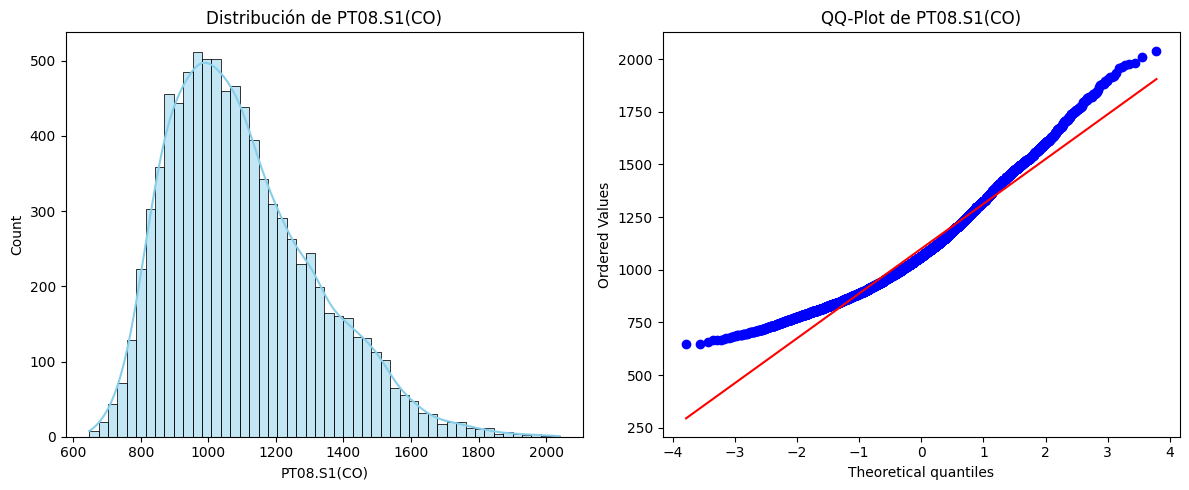


Pruebas de normalidad para la columna: PT08.S1(CO)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 94.77971
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


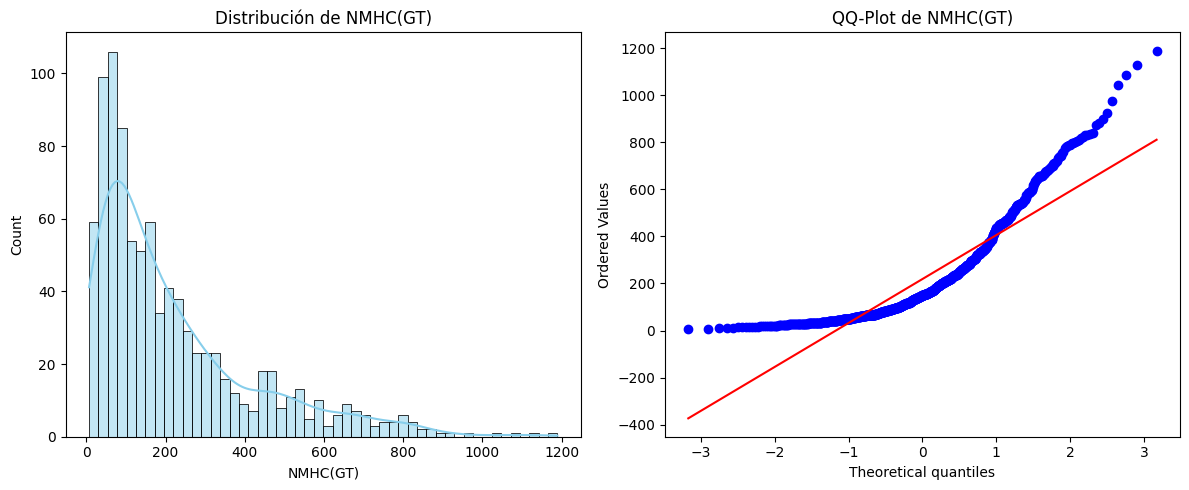


Pruebas de normalidad para la columna: NMHC(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 49.16993
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


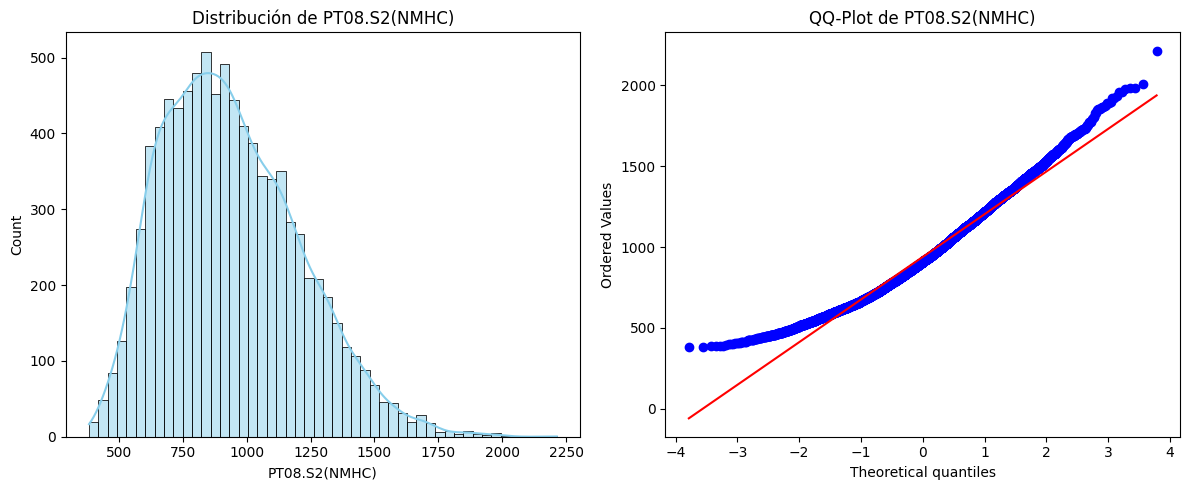


Pruebas de normalidad para la columna: PT08.S2(NMHC)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 47.73534
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


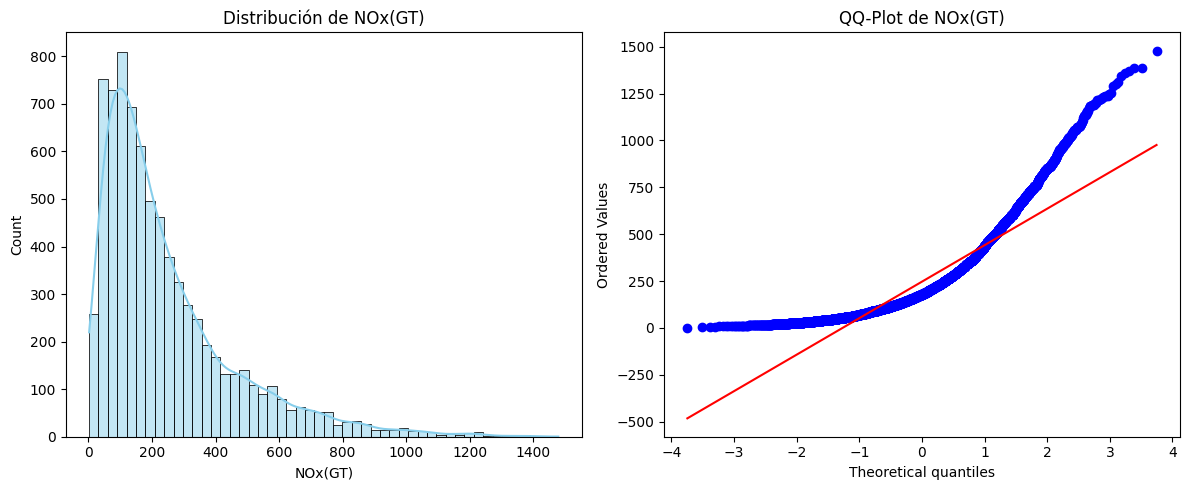


Pruebas de normalidad para la columna: NOx(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 359.32449
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


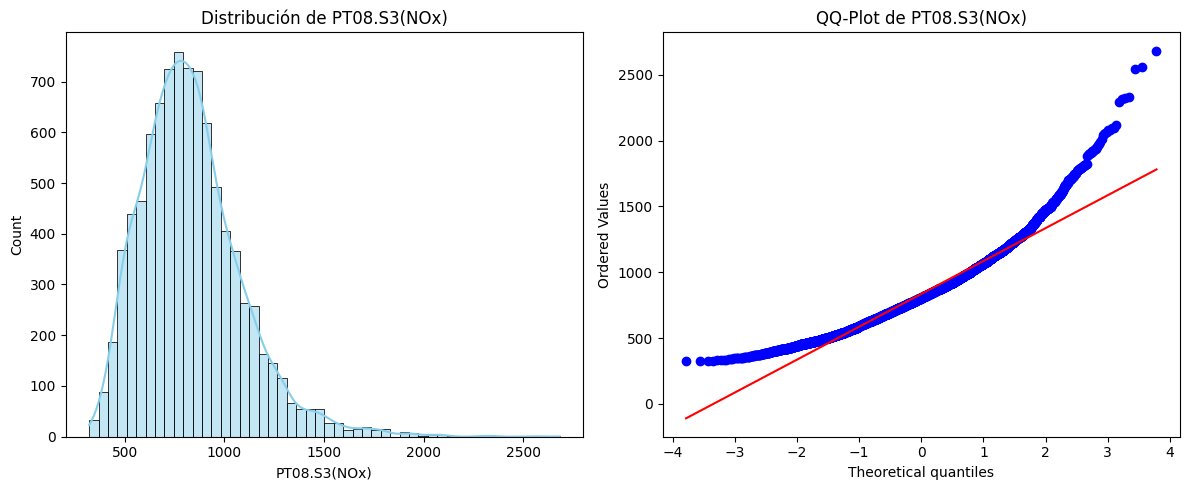


Pruebas de normalidad para la columna: PT08.S3(NOx)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 75.93359
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


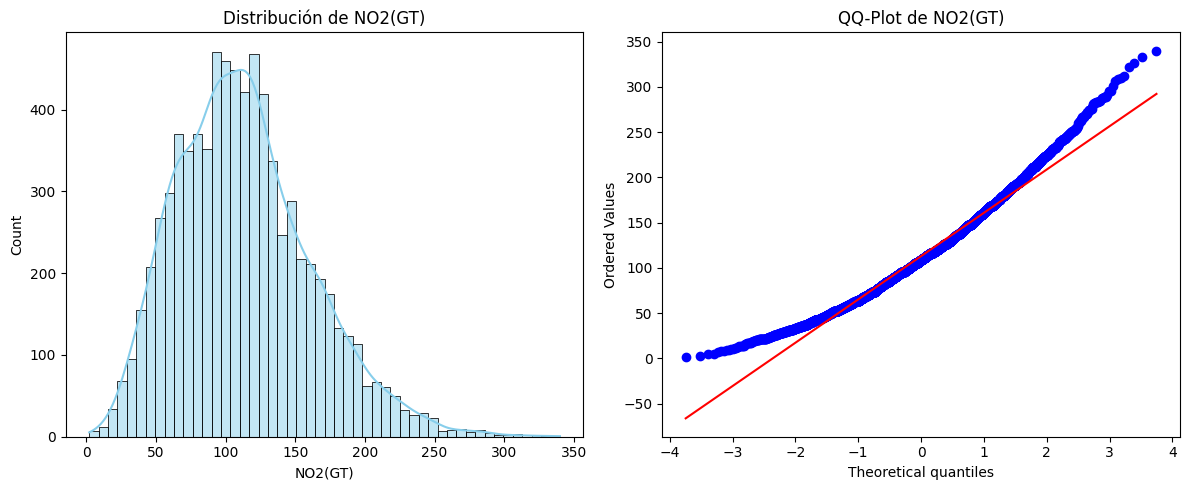


Pruebas de normalidad para la columna: NO2(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 34.68740
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


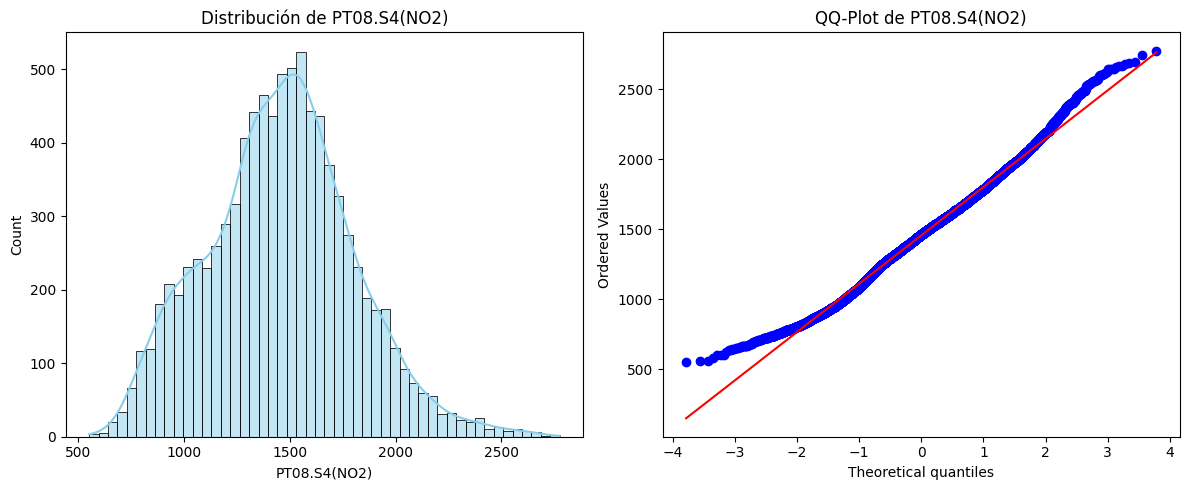


Pruebas de normalidad para la columna: PT08.S4(NO2)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00514
Anderson-Darling Test: Estadístico = 7.39673
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


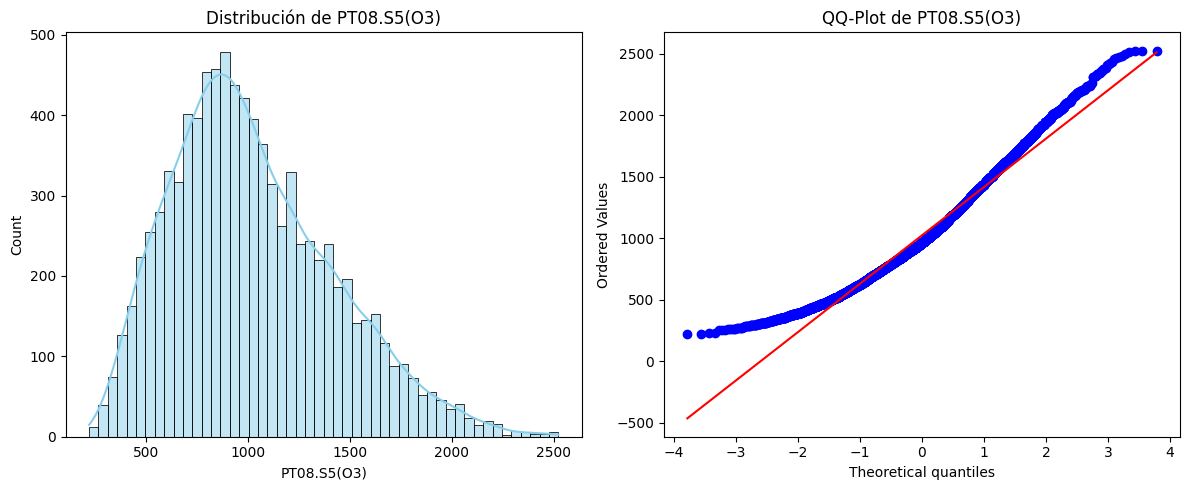


Pruebas de normalidad para la columna: PT08.S5(O3)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 65.86800
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


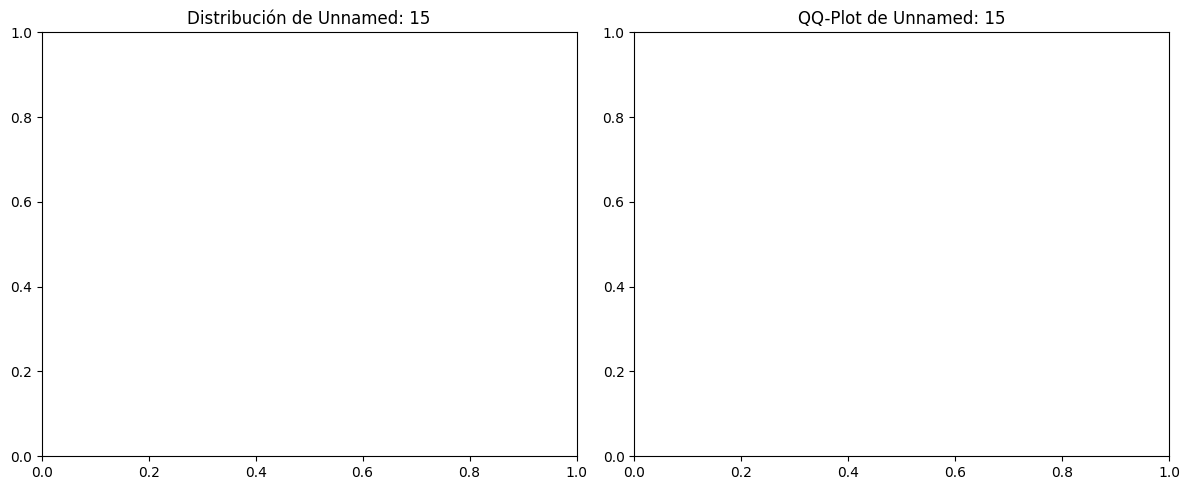


Pruebas de normalidad para la columna: Unnamed: 15
La columna Unnamed: 15 es constante. No se pueden realizar pruebas de normalidad.


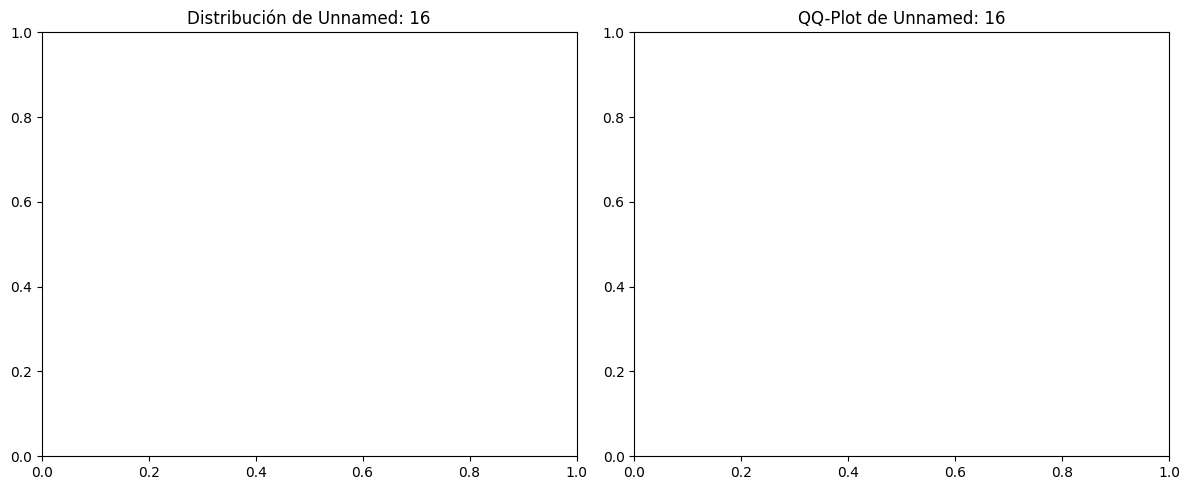


Pruebas de normalidad para la columna: Unnamed: 16
La columna Unnamed: 16 es constante. No se pueden realizar pruebas de normalidad.


In [102]:
# Seleccionar solo las columnas numéricas
columnas_pruebas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Limpiar datos nulos, no funciona sin eliminarlos
    data_clean = data.dropna()

    # Verificar si la columna tiene al menos dos valores únicos
    if data_clean.nunique() < 2:
        print(f"La columna {column_name} es constante. No se pueden realizar pruebas de normalidad.")
        return

    # Tomar una muestra para Shapiro-Wilk ya que es para menos datos
    sample_data = data_clean.sample(min(5000, len(data_clean)), random_state=42)

    try:
        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(sample_data)
        print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Shapiro-Wilk:", e)

    try:
        # Prueba de Kolmogorov-Smirnov
        ks_test = stats.kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
        print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Kolmogorov-Smirnov:", e)

    try:
        # Prueba de Anderson-Darling
        anderson_test = stats.anderson(data_clean, dist='norm')
        print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
        for i in range(len(anderson_test.critical_values)):
            sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
            if anderson_test.statistic < cv:
                print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
            else:
                print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    except Exception as e:
        print("Error en Anderson-Darling:", e)

    try:
        # Prueba de D'Agostino-Pearson
        dagostino_test = stats.normaltest(data_clean)
        print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")
    except Exception as e:
        print("Error en D'Agostino-Pearson:", e)

def plot_distribution(data, column_name):
    data_clean = data.dropna()  # Eliminar valores nulos, nuevamente para verificar
    plt.figure(figsize=(12, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data_clean, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_clean, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.tight_layout()
    plt.show()

# Aplicar pruebas y gráficos a cada columna numérica
for column in columnas_pruebas:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)


## Tratamiento de datos

Tipo de dato de cada columna despues de tratar los datos: 
<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             899

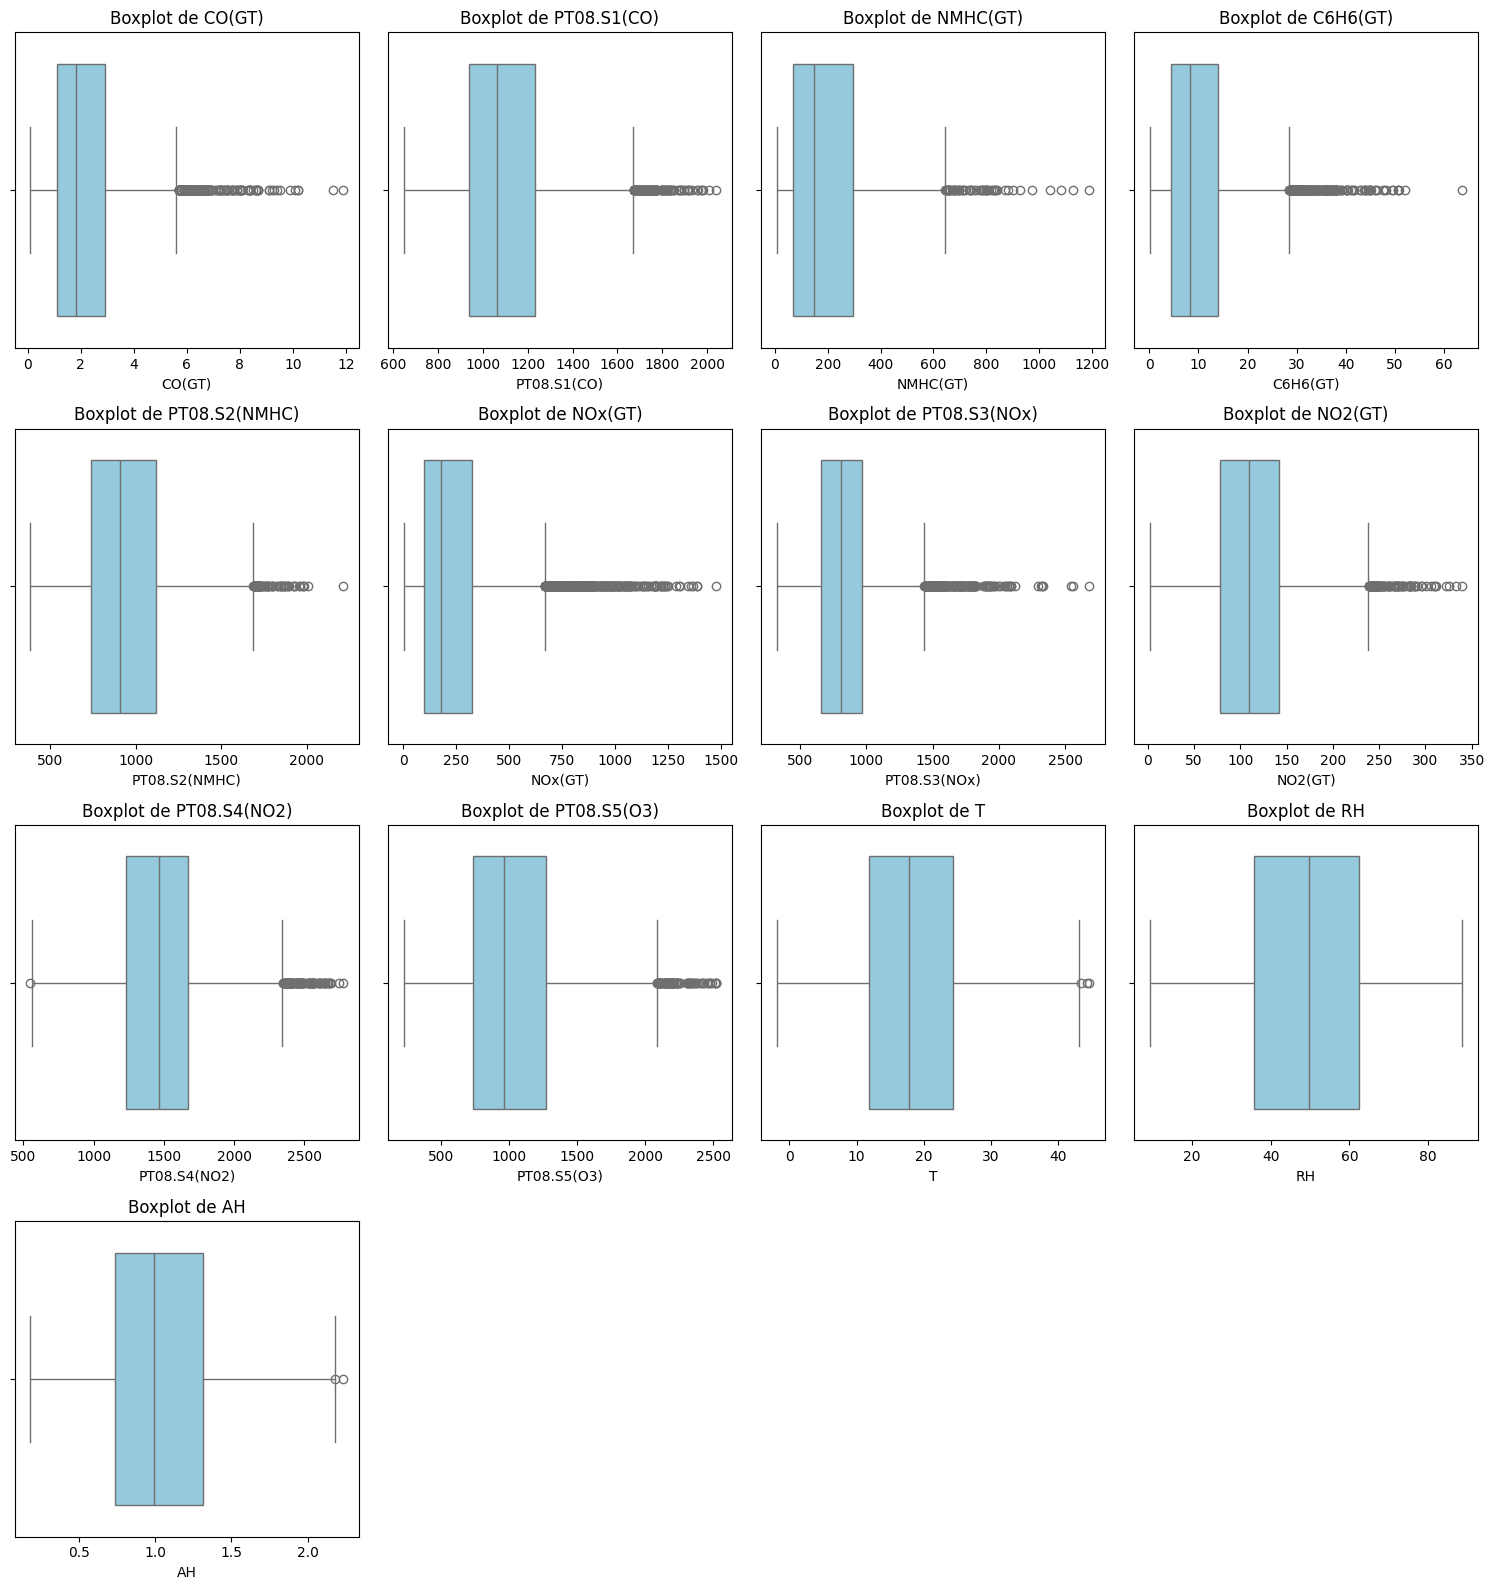


Valores faltantes despues de imputación:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
DayOfWeek        0
dtype: int64
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T           RH           AH             DateTime
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000  9357.000000  9357.000000                 9357
mean      2.089302  1098.392433   156.721599    10.009447     937.973923   235.178903    834.339959   112.373303   1456.528054  1020.562894    18.297574    49.248509     1.024352  2004-09-21 16:00:00
min       0.100000   6

In [103]:
# Reemplazo de "," a "." y conversion de la columna CO(GT), C6H6(GT), T, RH y AH a numérico
df[['CO(GT)','C6H6(GT)','T','RH','AH']] = df[['CO(GT)','C6H6(GT)','T','RH','AH']].apply(lambda col: col.str.replace(',','.')).astype(float)

# Reemplaze de "." a ":" en la columna Time
df['Time'] = df['Time'].str.replace('.',':')
# Creacion de columna DayOfWeek
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['DayOfWeek'] = df['DateTime'].dt.day_name()
# Conversión a columna tipo category
df['DayOfWeek'] = df['DayOfWeek'].astype('category')

# Eliminamos las filas vacías completas
df = df.dropna(how='all')
# Eliminamos las columnas vacías completas
df = df.dropna(axis=1, how='all')

# Volvemos a realizar la descripción estadística
print('Tipo de dato de cada columna despues de tratar los datos: ')
print(df.info())
print('\n')
print('El EDA despues de tratar los datos: ')
print(df.describe().to_string())

# Moda
moda = df.mode().iloc[0]
print('\nLa moda despues de tratar los datos: ')
print(moda)
# Valores faltantes
print("\nValores faltantes despues de tratar los datos:")
print(df.isnull().sum())

# Revisamos nuevamente si hay duplicados
print('\nNúmero de filas duplicadas despues de tratar los datos', df.duplicated().sum())

# Revision de datos atipicos para realizar la imputacion adecuada
# Seleccionar solo columnas float64
columnas_box = df.select_dtypes(include=[np.number]).columns

# Calculo cuántas filas necesita el subplot
n = len(columnas_box)
rows = (n - 1) // 4 + 1

# Configuramos el tamaño de la figura
plt.figure(figsize=(15, rows * 4))

# Creamos boxplots para cada columna float64. dropna ayuda a cargarlos ya que marcaba error por datos faltantes
for i, col in enumerate(columnas_box, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Utilizamos imputación por mediana ya que existen outliers que afectan la media.
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Valores faltantes
print("\nValores faltantes despues de imputación:")
print(df.isnull().sum())
print(df.describe().to_string())


## EDA despues de tratamiento de datos

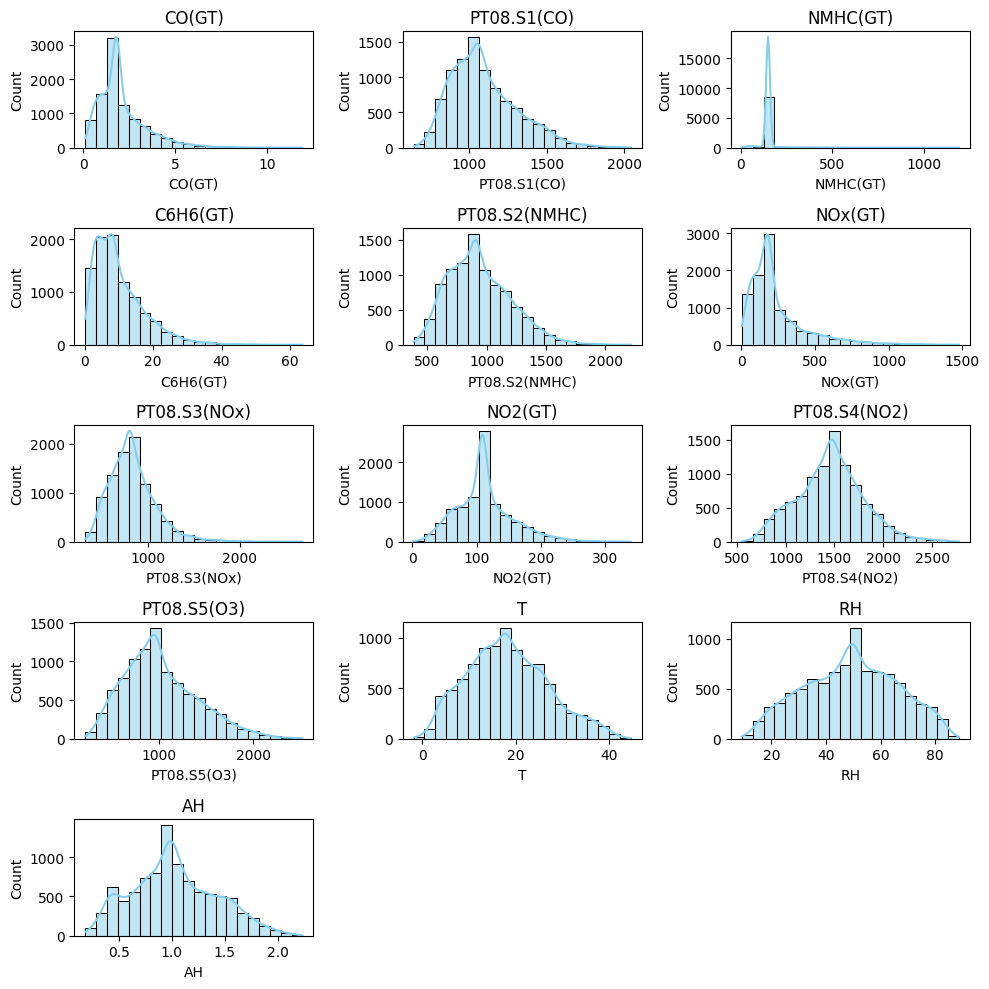

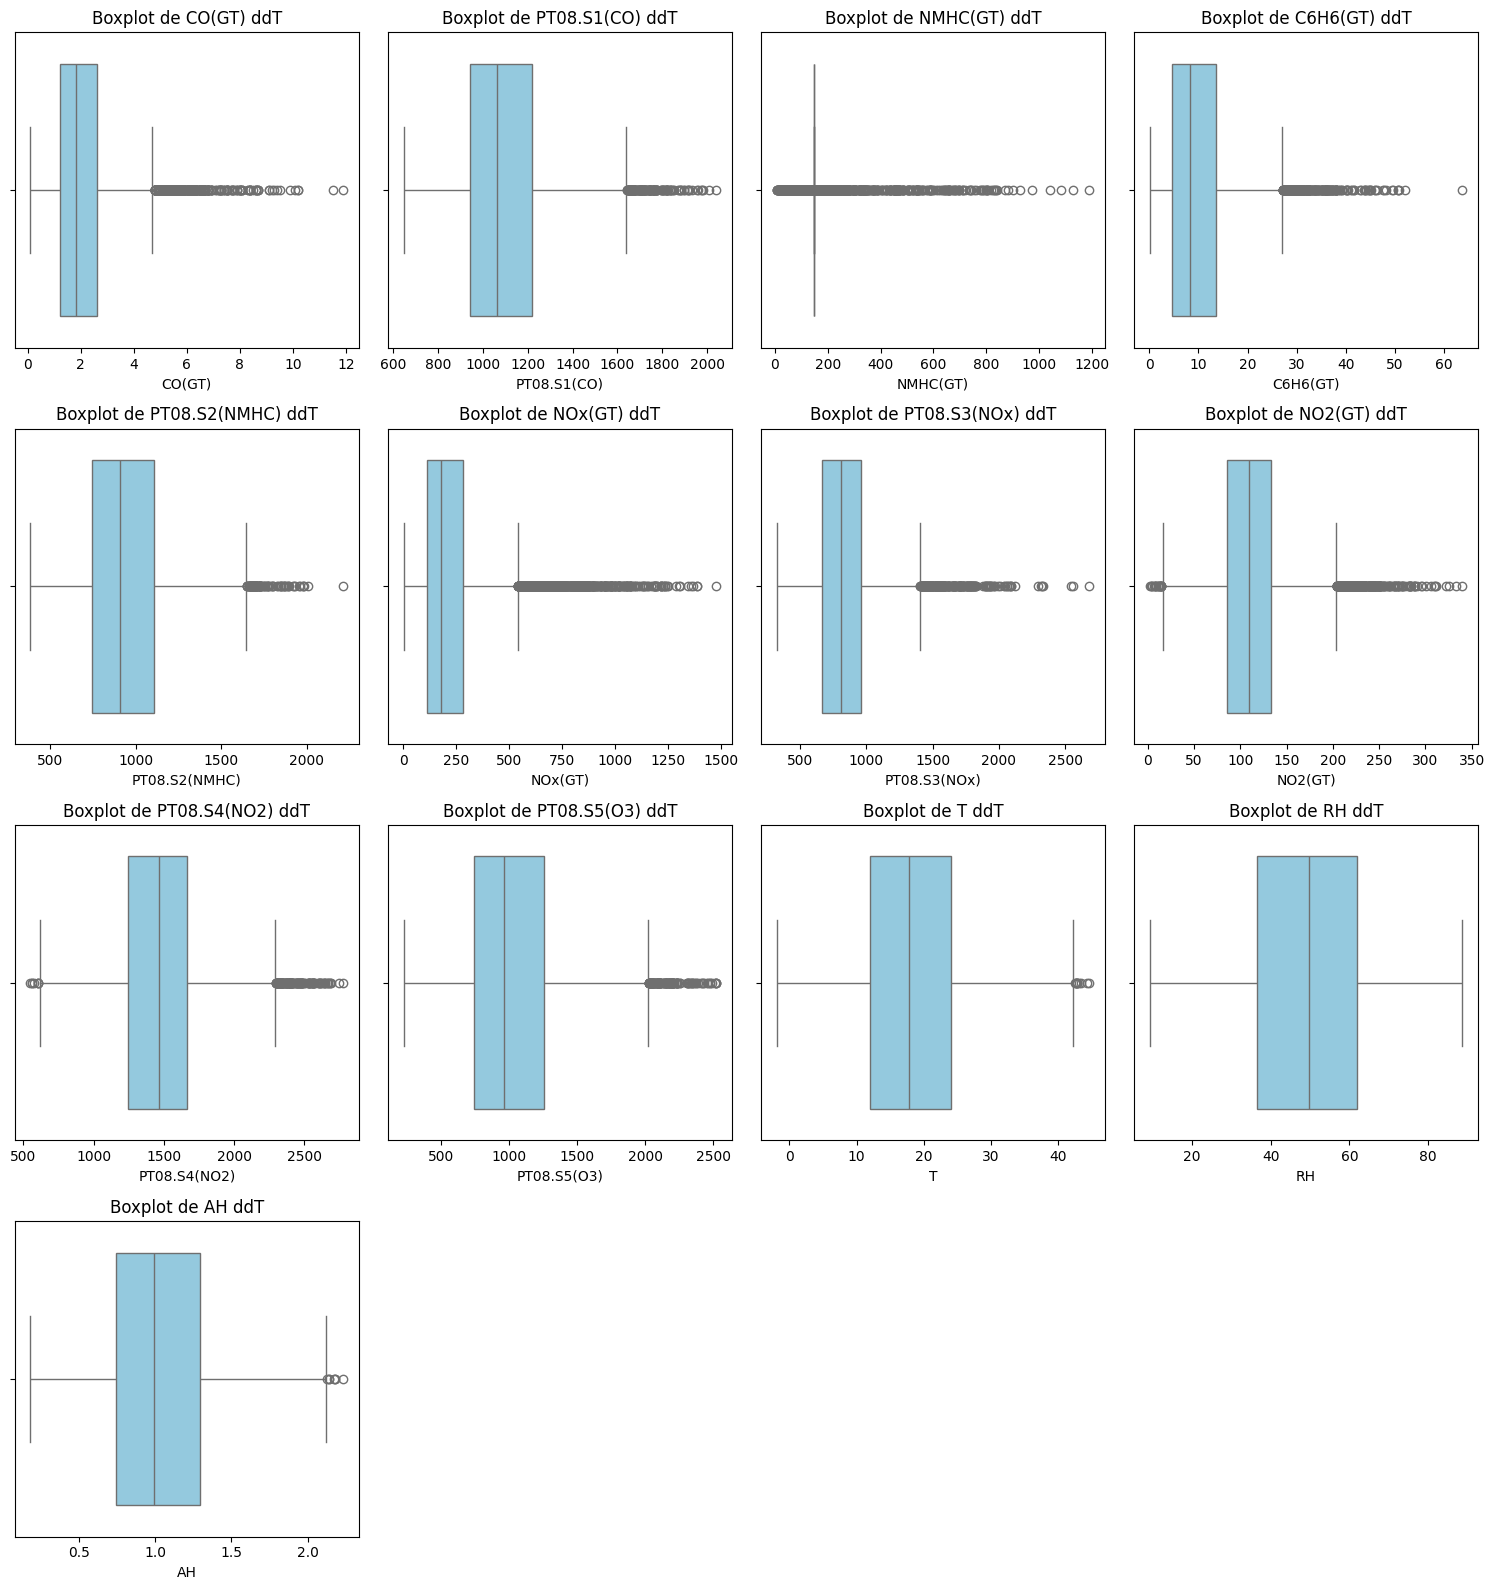

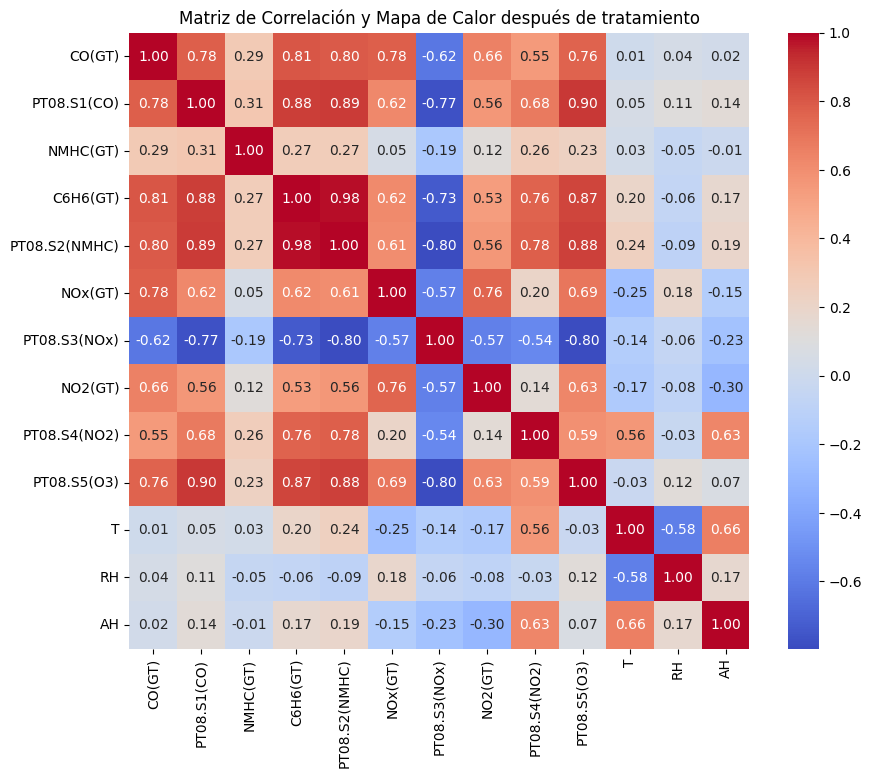

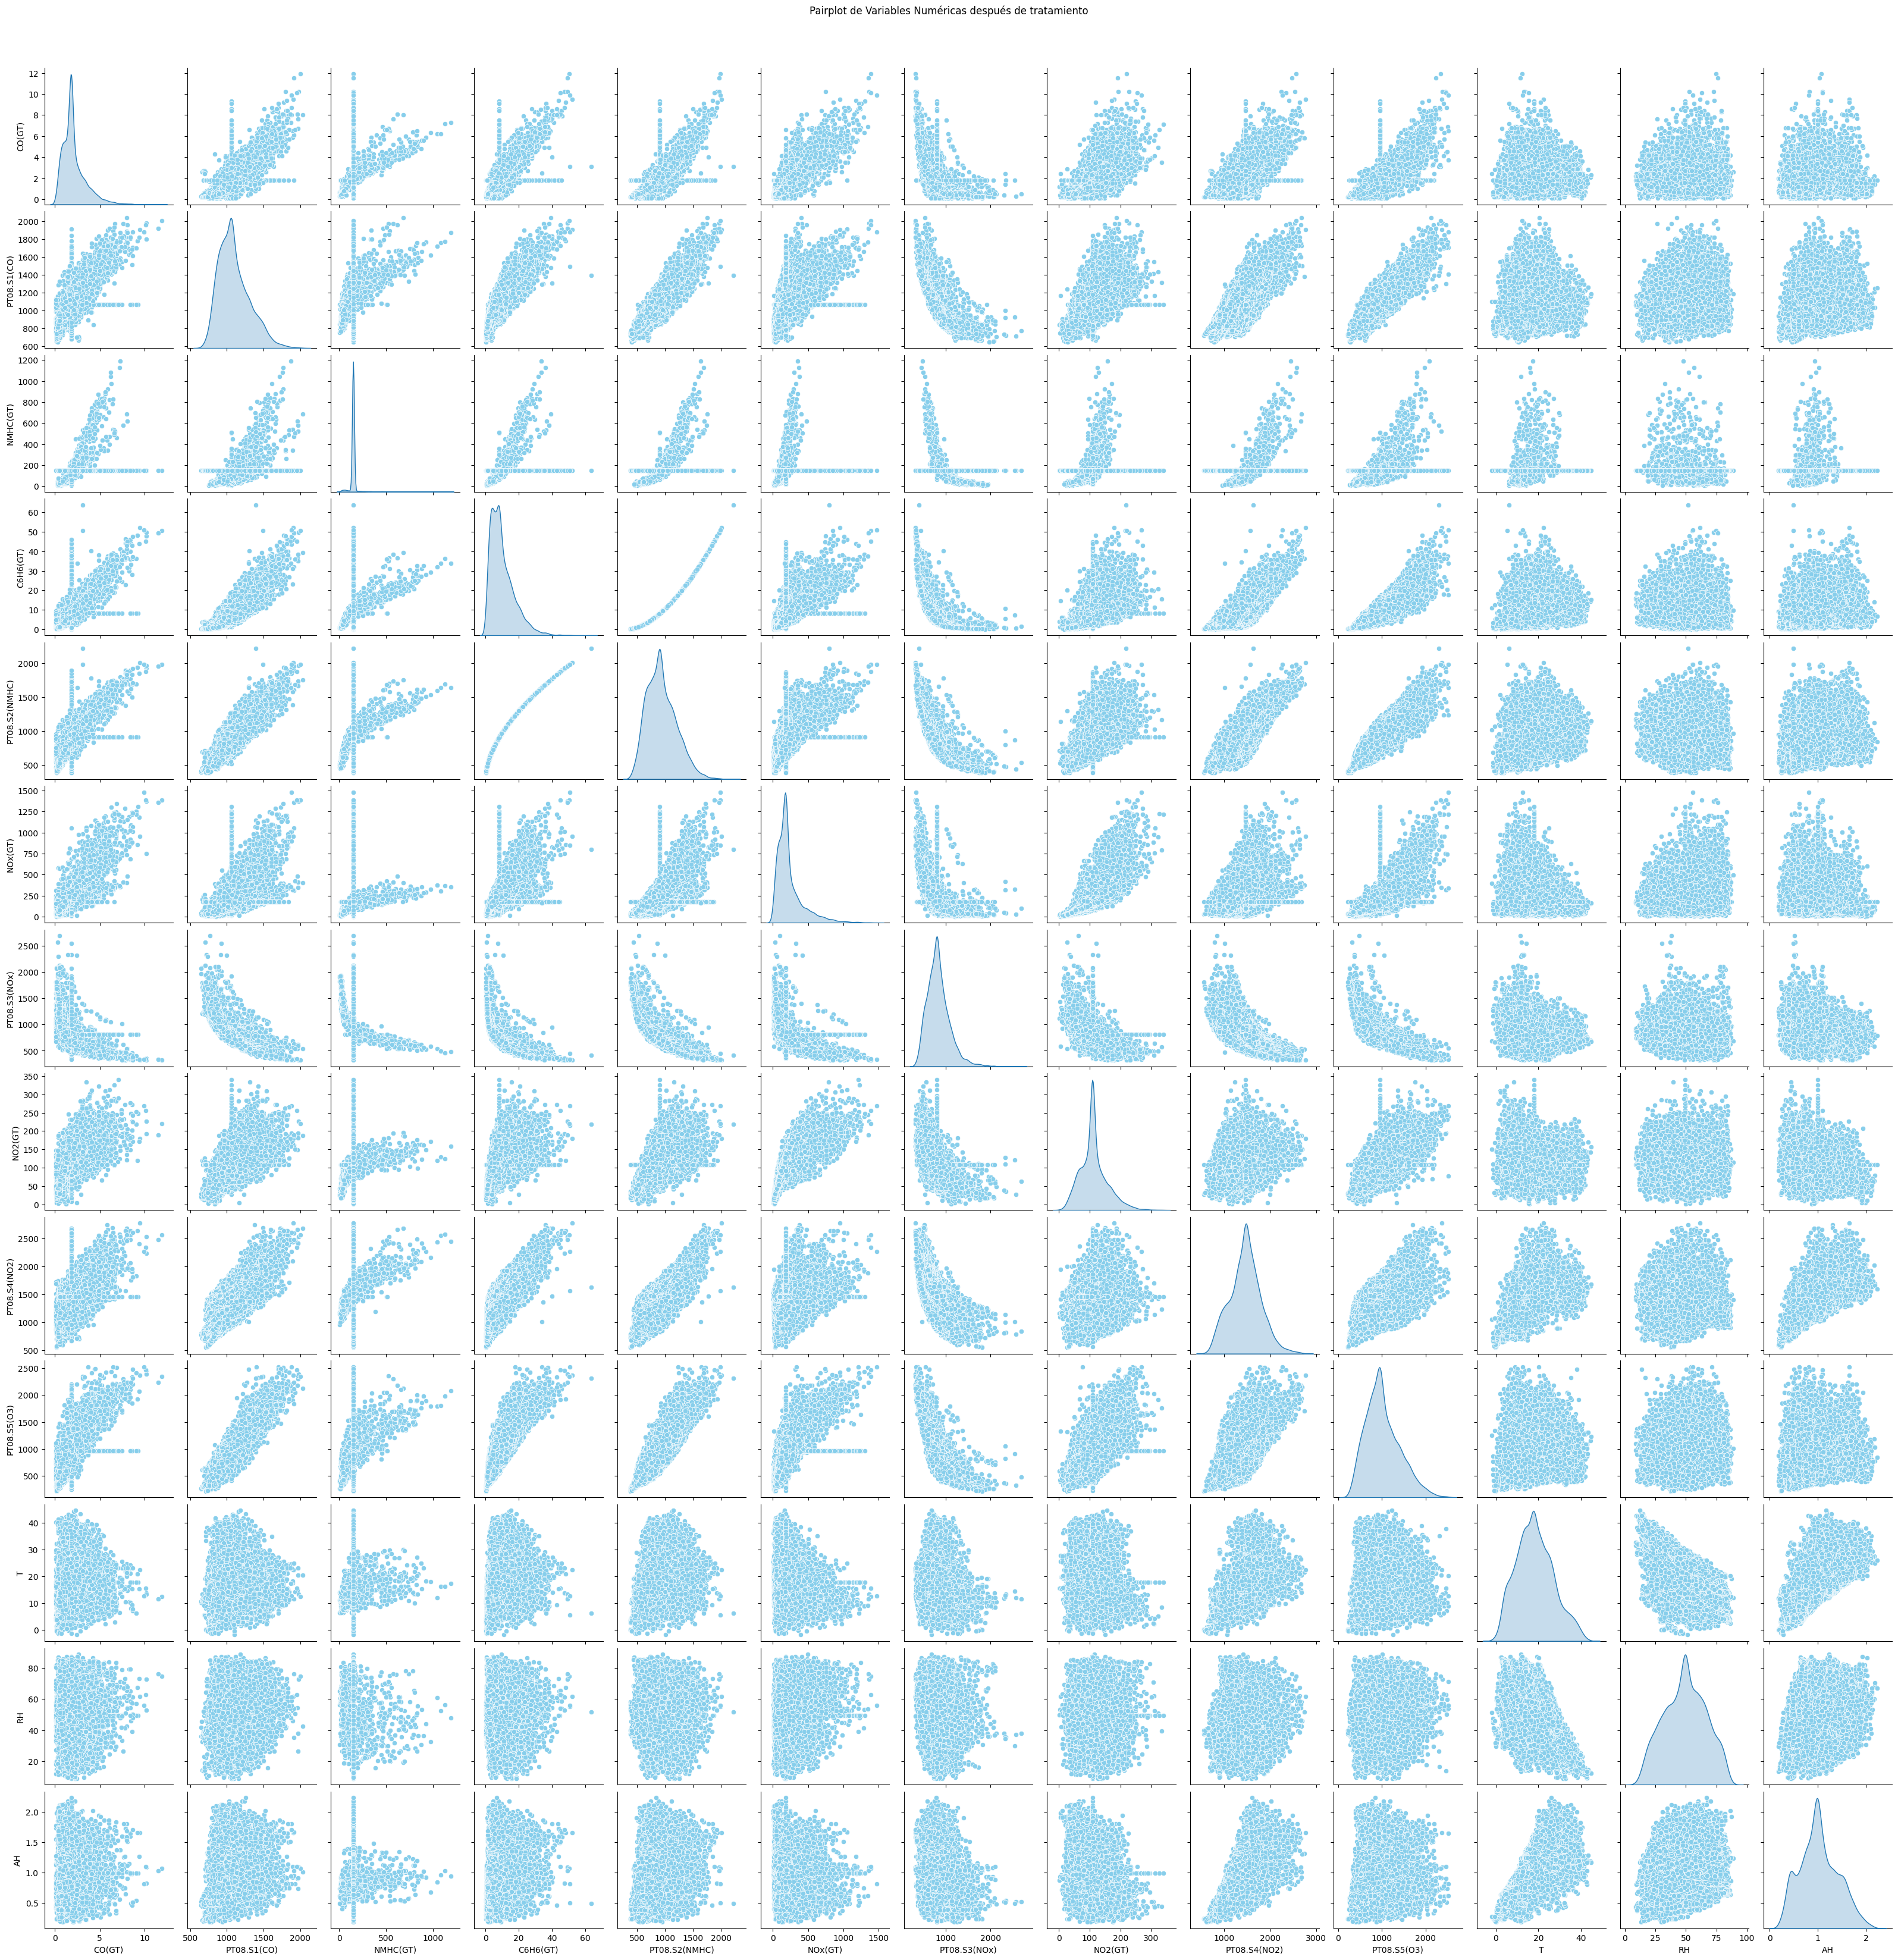

In [104]:
# Seleccionamos las columnas tipo float64
columnas_hist = df.select_dtypes(include=[np.number])

# Definimos la cantidad de gráficos y la cuadrícula para mostrar los datos ddT
num_plots = len(columnas_hist.columns)
cols = 3  # Número de columnas en la cuadrícula
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(10, 10))
for i, col in enumerate(columnas_hist.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(columnas_hist[col].dropna(), bins=20, kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

# Seleccionar solo columnas float64
columnas_box = df.select_dtypes(include=[np.number]).columns

# Calculo cuántas filas necesita el subplot
n = len(columnas_box)
rows = (n - 1) // 4 + 1

# Configuramos el tamaño de la figura
plt.figure(figsize=(15, rows * 4))

# Creamos boxplots para cada columna float64.
for i, col in enumerate(columnas_box, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f'Boxplot de {col} ddT') # ddt= después de tratamiento
plt.tight_layout()
plt.show()

columnas_corr = df.select_dtypes(include=[np.number])
# Calculamos matriz de correlación
matriz_corr = columnas_corr.corr()

# Tamaño de la figura y generación del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación y Mapa de Calor después de tratamiento")
plt.show()

# Generar pairplot para las columnas numéricas
sns.pairplot(df.select_dtypes(include=[np.number]),
             diag_kind='kde',   # para que la diagonal muestre la densidad
             plot_kws={'color': 'skyblue'})
plt.suptitle("Pairplot de Variables Numéricas después de tratamiento", y=1.02)
plt.show()

## Pruebas de Normalidad después de Tratamiento

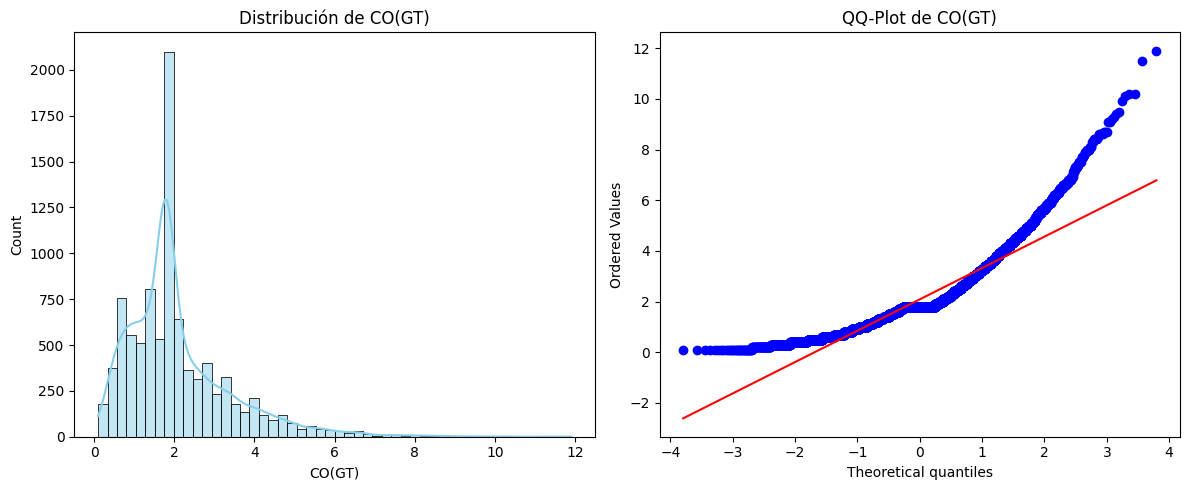


Pruebas de normalidad ddT para la columna: CO(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 315.91164
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


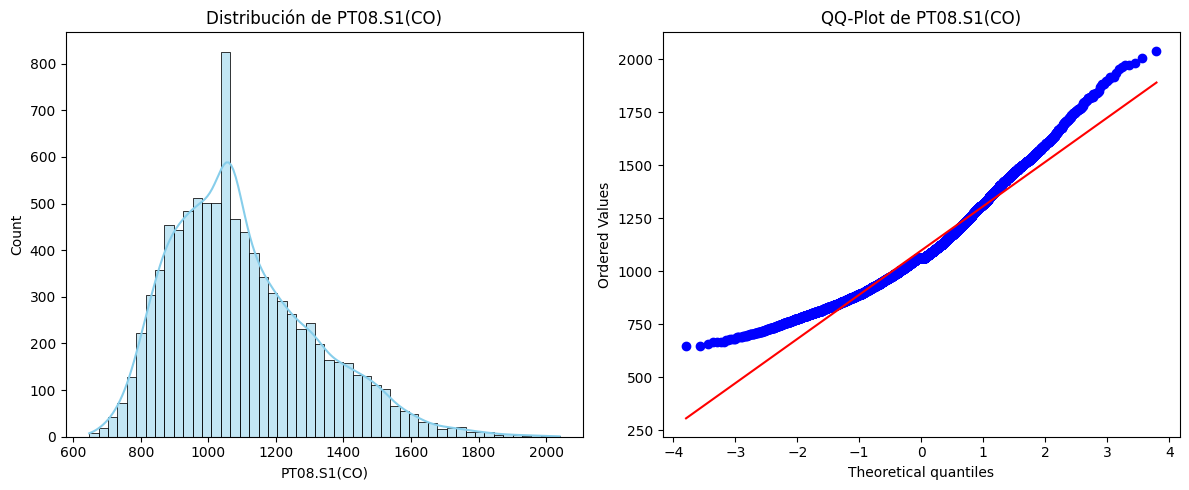


Pruebas de normalidad ddT para la columna: PT08.S1(CO)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 103.12601
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


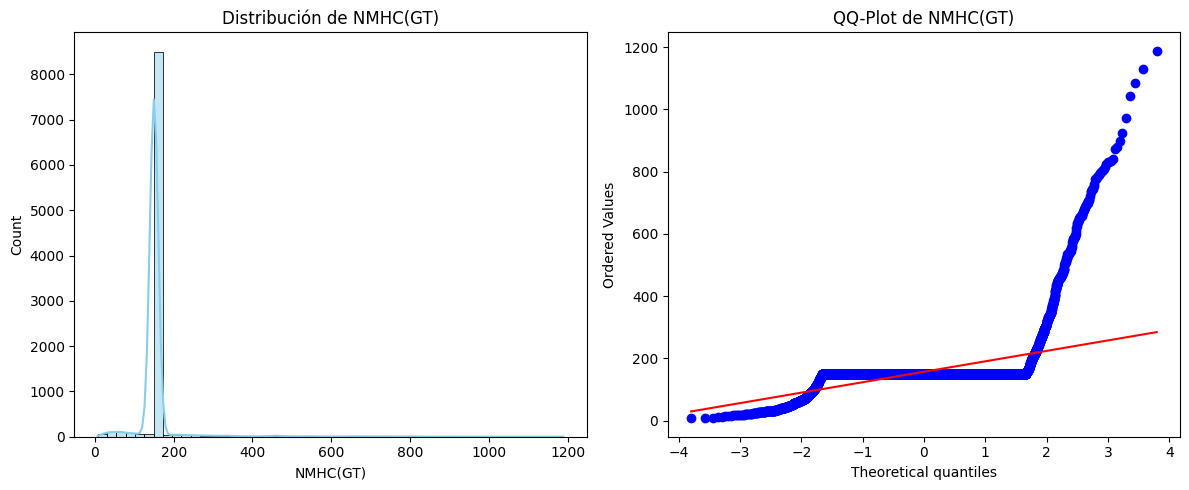


Pruebas de normalidad ddT para la columna: NMHC(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 2808.06899
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


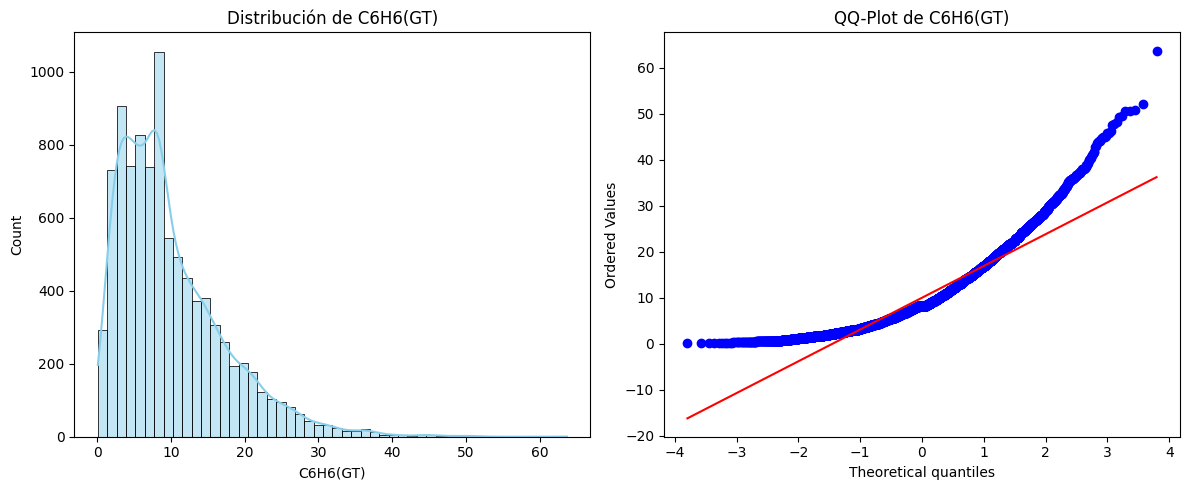


Pruebas de normalidad ddT para la columna: C6H6(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 247.10194
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


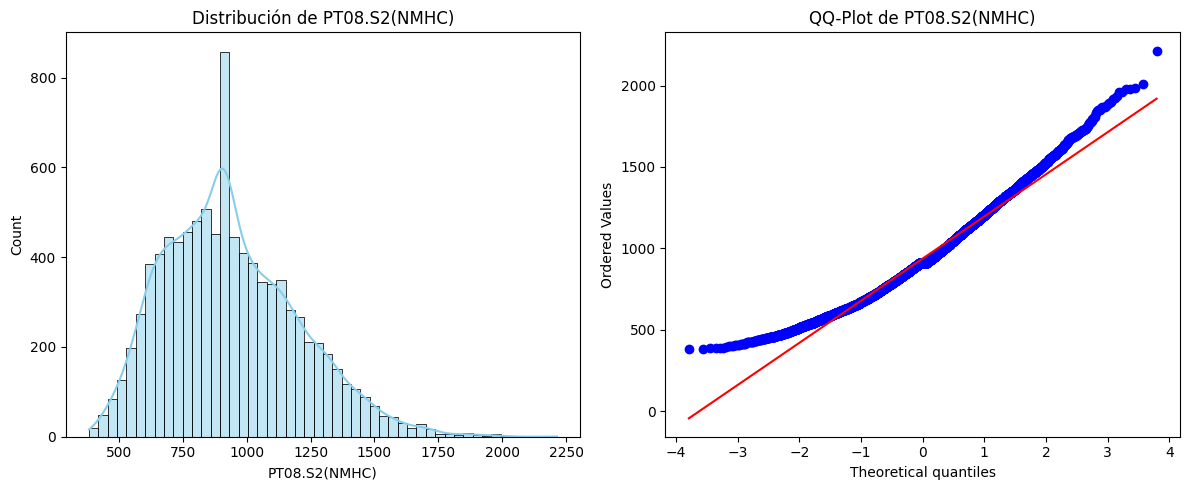


Pruebas de normalidad ddT para la columna: PT08.S2(NMHC)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 49.71409
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


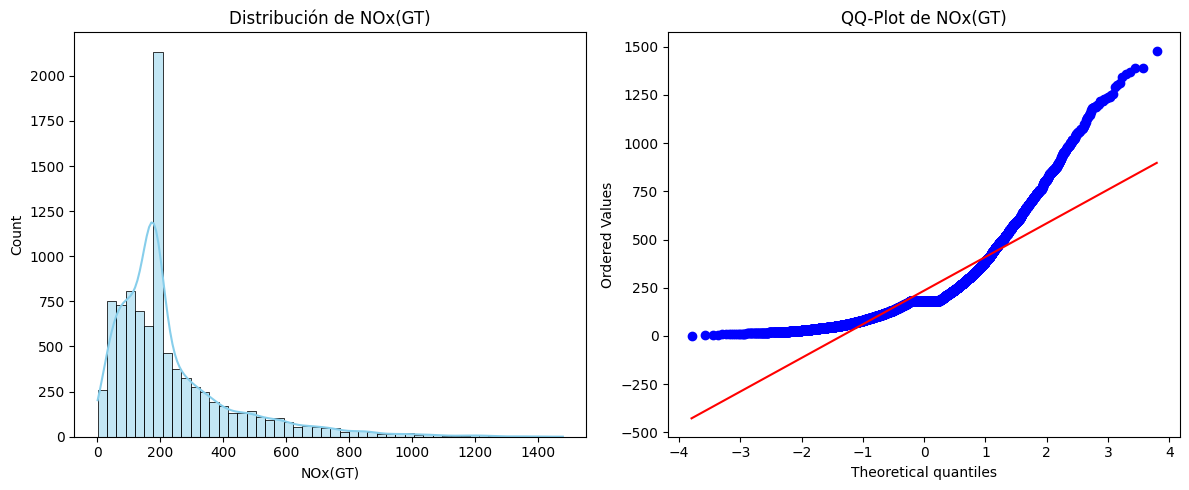


Pruebas de normalidad ddT para la columna: NOx(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 559.57109
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


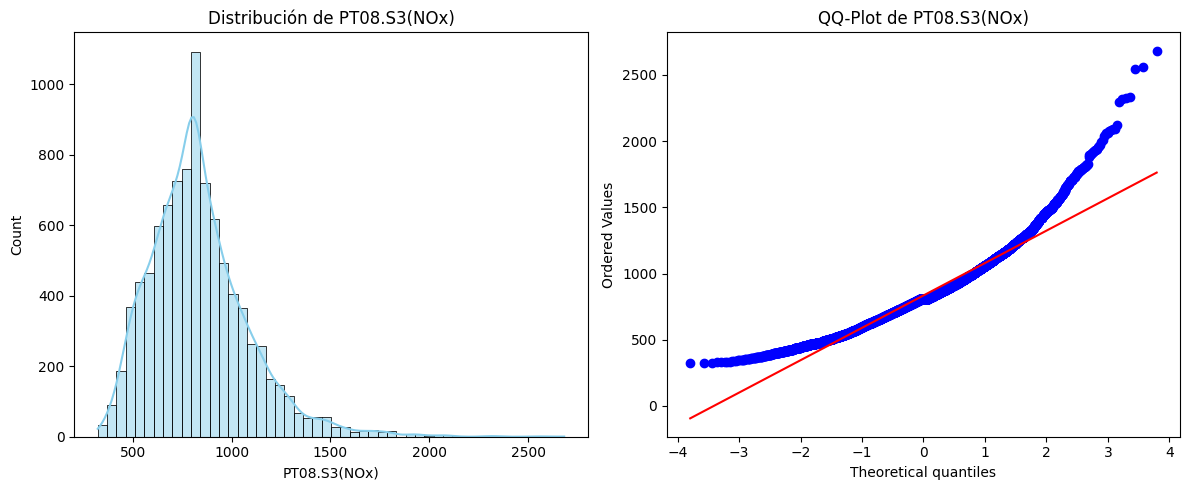


Pruebas de normalidad ddT para la columna: PT08.S3(NOx)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 87.97310
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


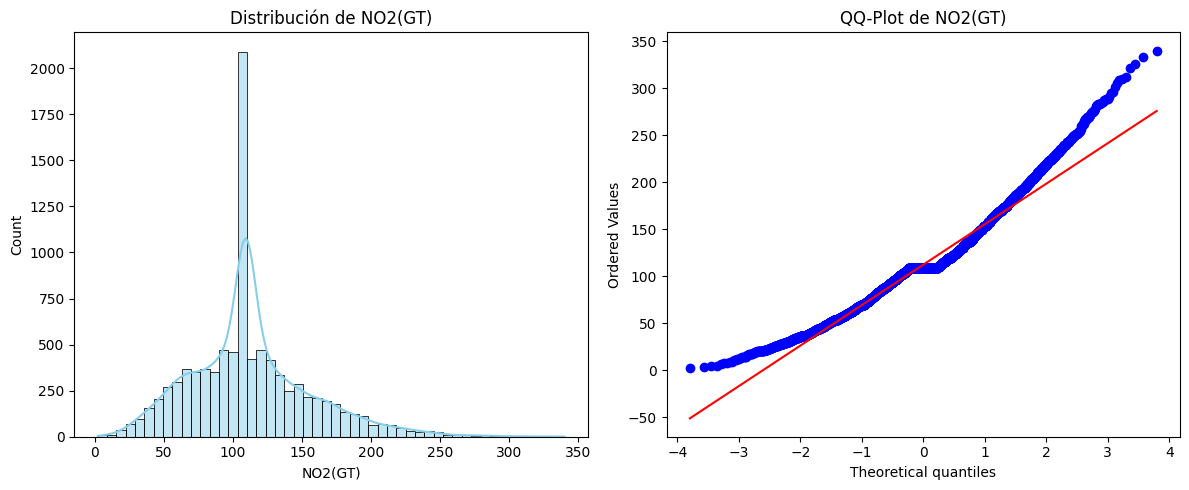


Pruebas de normalidad ddT para la columna: NO2(GT)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 122.29970
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


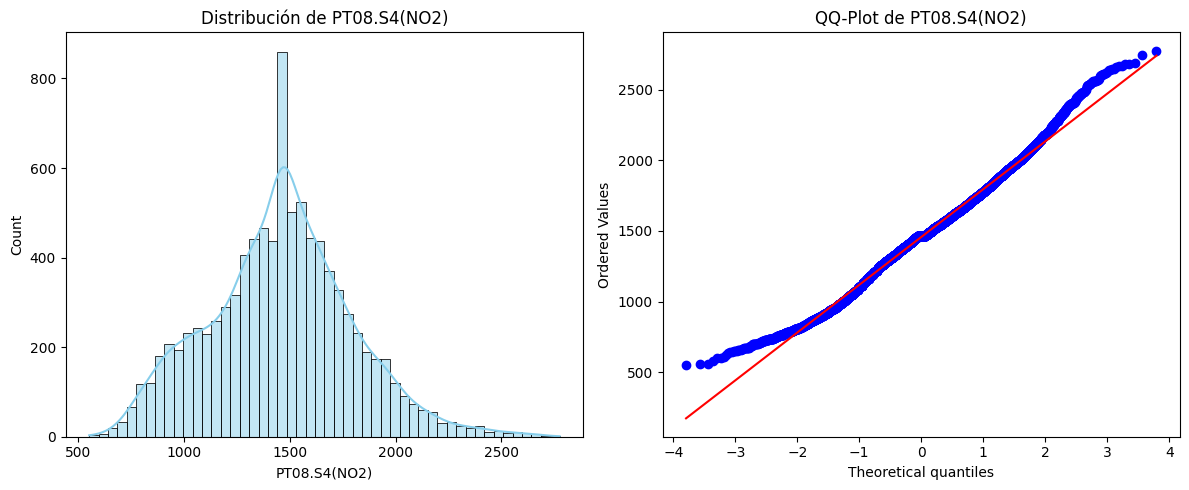


Pruebas de normalidad ddT para la columna: PT08.S4(NO2)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 14.29705
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


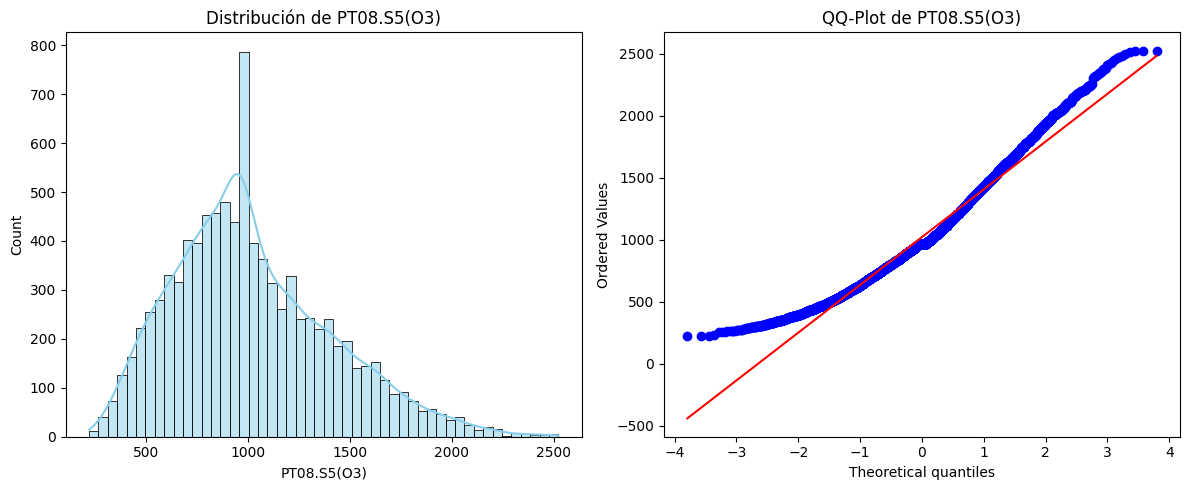


Pruebas de normalidad ddT para la columna: PT08.S5(O3)
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 73.27645
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


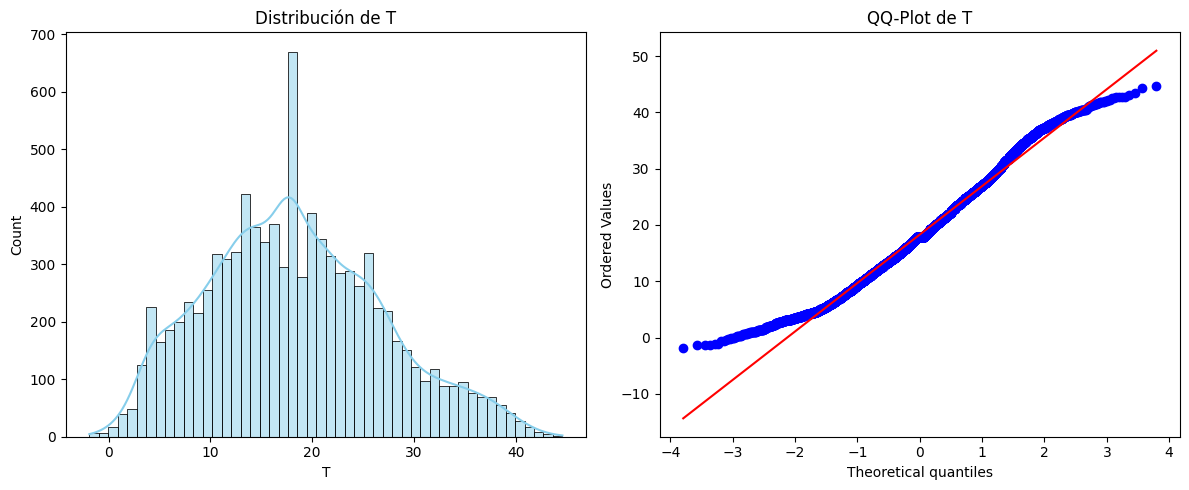


Pruebas de normalidad ddT para la columna: T
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 21.92645
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


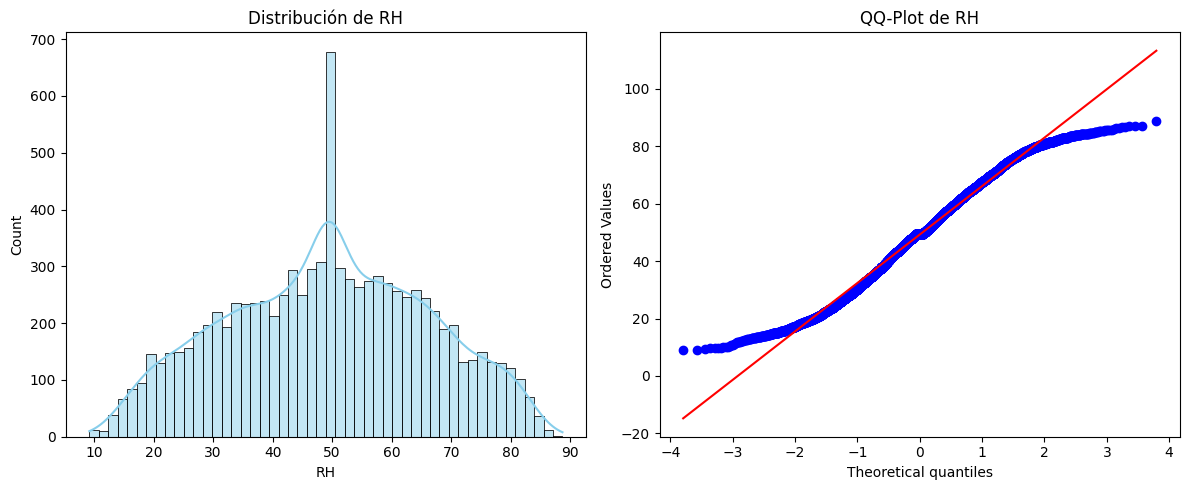


Pruebas de normalidad ddT para la columna: RH
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 20.58979
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


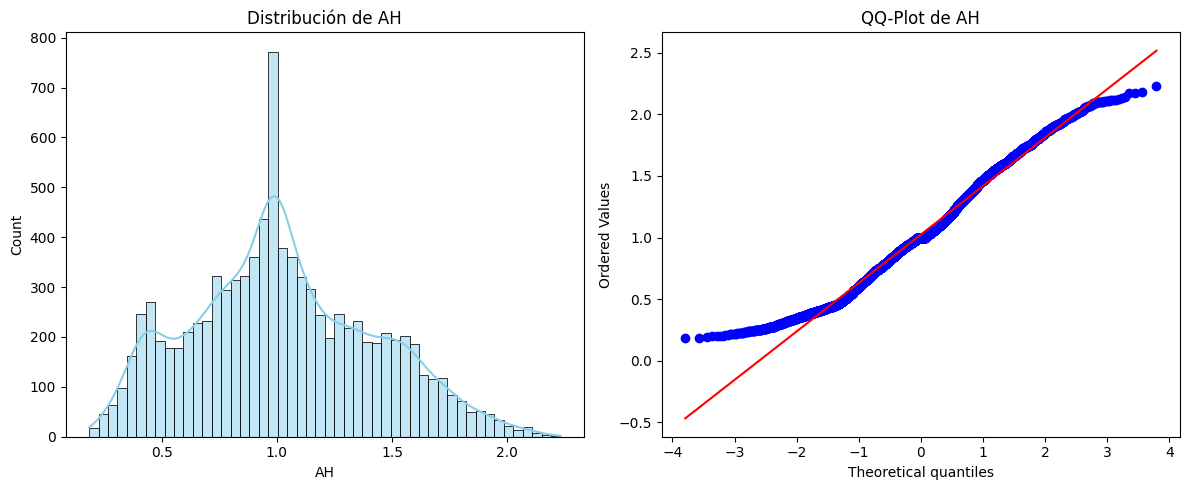


Pruebas de normalidad ddT para la columna: AH
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 30.76443
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [105]:
# Seleccionar solo las columnas numéricas
columnas_pruebas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad ddT para la columna: {column_name}")

    # Limpiar datos nulos, no funciona sin eliminarlos
    data_clean = data.dropna()

    # Verificar si la columna tiene al menos dos valores únicos
    if data_clean.nunique() < 2:
        print(f"La columna {column_name} es constante. No se pueden realizar pruebas de normalidad.")
        return

    # Tomar una muestra para Shapiro-Wilk ya que es para menos datos
    sample_data = data_clean.sample(min(5000, len(data_clean)), random_state=42)

    try:
        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(sample_data)
        print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Shapiro-Wilk:", e)

    try:
        # Prueba de Kolmogorov-Smirnov
        ks_test = stats.kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
        print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")
    except Exception as e:
        print("Error en Kolmogorov-Smirnov:", e)

    try:
        # Prueba de Anderson-Darling
        anderson_test = stats.anderson(data_clean, dist='norm')
        print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
        for i in range(len(anderson_test.critical_values)):
            sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
            if anderson_test.statistic < cv:
                print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
            else:
                print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    except Exception as e:
        print("Error en Anderson-Darling:", e)

    try:
        # Prueba de D'Agostino-Pearson
        dagostino_test = stats.normaltest(data_clean)
        print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")
    except Exception as e:
        print("Error en D'Agostino-Pearson:", e)

def plot_distribution(data, column_name):
    data_clean = data.dropna()  # Eliminar valores nulos, nuevamente para verificar
    plt.figure(figsize=(12, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data_clean, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_clean, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.tight_layout()
    plt.show()

# Aplicar pruebas y gráficos a cada columna numérica
for column in columnas_pruebas:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)
